## Insurance Claim Fraud Detection

### Project Description

- Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
- In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### Independent Variables
- months_as_customer: Number of months of patronage
- age: the length of time a customer has lived or a thing has existed
- policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
- policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
- policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
- policy_csl: is basically Combined Single Limit
- policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
- policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
- umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
- insured_zip: It is the zip code where the insurance was made
- insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
- insured_education_level: This refers to the Level of education of the customer
- insured_occupation: This refers Occupation of the customer
- insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
- insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
- capital-gains: This refers to profit accrued due to insurance premium
- capital-loss: This refers to the losses incurred due to insurance claims
- incident_date: This refers to the date which claims where made by customers
- incident_type: This refers to the type of claim/vehicle damage made by customer
- collision_type: This refers to the area of damage on the vehicle
- incident_severity: This refers to the extent/level of damage
- authorities_contacted: This refers to the government agencies that were contacted after damage
- incident_state: This refers to the state at which the accident happened
- incident_city: This refers to the city at which the accident happened
- incident_location: This refers to the location at which the accident happened
- incident_hour_of_the_day: The period of the day which accident took place
- number_of_vehicles_involved: This refers to number of vehicles involved the accident
- property_damage: This refers to whether property was damaged or not
- bodily_injuries: This refers to injuries sustained
- witnesses: This refers to the number of witnesses involved
- police_report_available: This refers to whether the report on damage was documented or not
- total_claim_amount: This refers to the financial implications involved in claims
- injury_claim: This refers to physical injuries sustained
- property_claim: This refers to property damages during incident
- vehicle_claim: This refers to property damages during incident
- auto_make: This refers to the make of the vehicle
- auto_model: This refers to the model of the vehicle
- auto_year: This refers to the year which the vehicle was manufactured
- _c39:
- fraud_reported

##### Dataset Link-  
- https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
## Importing Necessary Libraries
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

- Importing the Dataset

In [2]:
df = pd.read_csv('Fraud_Detection')
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 1000
No of Columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


- The Dataset has 1000 rows and 40 columns
- The Dependent/Output feature is 'fraud_reported' which has 2 types of values 'Yes/No' which makes this problem a classification problem.

### Data Pre-Proceesing

- Lets Check the Unique values for each columns in Dataset

In [3]:
df.nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


- The features ['_c39', 'incident_location', 'insured_zip', 'policy_number'] are uncessary columns becuase thay have unique values for all rows or have complete empty column

In [4]:
df.drop(['_c39', 'incident_location', 'insured_zip', 'policy_number'], axis=1, inplace=True)
print(df.shape)
df

(1000, 36)


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


- After removing Uncessary colmns we are left with 36 features

### Missing Values

In [5]:
df.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

In [6]:
df.duplicated().any()

False

In [7]:
df.isin(['NA','N/A','-',' ']).sum().any()

False

In [8]:
df.isin(['?']).sum().any()

True

- There are no Duplicated or NULL values in Dataset after removing some features, However there seems to be '?' in some rows which needs to be converted to NAN values

- we will replace '?' with Nan values

In [9]:
df = df.replace('?', np.NaN)

In [10]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
auto_model                                0             0.0
auto_make                                 0             0.0
vehicle_claim                             0             0.0
property_claim                            0             0.0
injury_claim                              0             0.0
total_claim_amount                        0             0.0
authorities_contacted                     0             0.0
witnesses                                 0             0.0
bodily_injuries                           0             0.0
auto_year                                 0             0.0
number_of_vehicles_involved               0             0.0
incident_hour_of_the_day                  0             0.0
incident_city                           

#### Missing Value Imputation

- We will fill Nan values in Categorical feature with mode of the particular feature and with mean in Numerical Columns of a particular feature.

In [11]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

Confirmation using heatmap

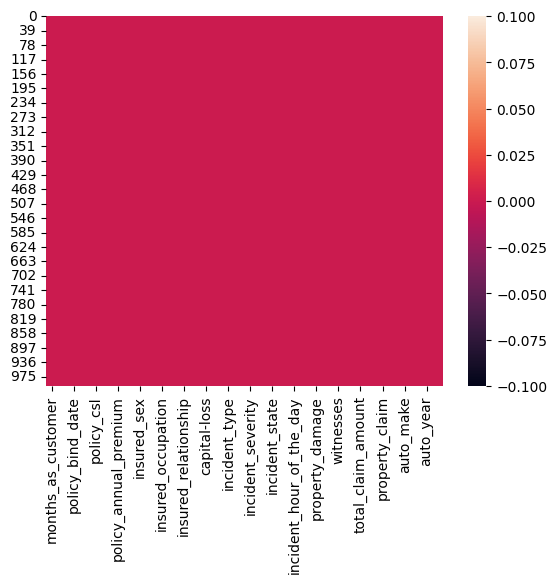

In [12]:
sns.heatmap(df.isnull())
plt.show()

- There are no more Missing values in the Dataset

In [13]:
df.shape

(1000, 36)

In [14]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print("*"*50)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
**************************************************
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
**************************************************
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
*******************************************

Checking the number of rows covered by all the unique values present in our object data type columns we can conclude that:

- The features 'policy_bind_date','incident_date' again has date related data

These two columns are marked as object dtype but they hold date related information and will need to be handled accordingly.

In [15]:
# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_year'] = df['policy_bind_date'].apply(lambda x:x.year)

# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_year'] = df['incident_date'].apply(lambda x:x.year)

- We have separated the date object datatype columns into 3 columns for day, month and year each.

In [16]:
# dropping the original Date columns after separating the desired outputs
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,2015


In [17]:
## Incident year for all rows is 2015 so there is no use of the feature
df.drop('incident_year',axis=1, inplace=True)

In [18]:
df.shape

(1000, 39)

##### Combined single limit (CSL):
-CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

- In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
- We will split this column into two CSL columns for person and accident.

In [19]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [20]:
# Dropping original policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

- The feature 'auto_year' depicts Automobile age. We will do feature engineering to create new columns with automobile age.
- As incident year is 2015, we will use 2015 as base year for new column creation.

In [21]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']= 2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

In [22]:
df.shape

(1000, 40)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [24]:
Categorical_features = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']

In [25]:
Numerical_features = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']


- Seperating Numerical and Categorical features

In [26]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.000000,203.954000,115.113174,0.000000,115.750000,199.500000,276.250000,479.000000
age,1000.000000,38.948000,9.140287,19.000000,32.000000,38.000000,44.000000,64.000000
policy_deductable,1000.000000,1136.000000,611.864673,500.000000,500.000000,1000.000000,2000.000000,2000.000000
policy_annual_premium,1000.000000,1256.406150,244.167395,433.330000,1089.607500,1257.200000,1415.695000,2047.590000
umbrella_limit,1000.000000,1101000.000000,2297406.598118,-1000000.000000,0.000000,0.000000,0.000000,10000000.000000
capital-gains,1000.000000,25126.100000,27872.187708,0.000000,0.000000,0.000000,51025.000000,100500.000000
capital-loss,1000.000000,-26793.700000,28104.096686,-111100.000000,-51500.000000,-23250.000000,0.000000,0.000000
incident_hour_of_the_day,1000.000000,11.644000,6.951373,0.000000,6.000000,12.000000,17.000000,23.000000
number_of_vehicles_involved,1000.000000,1.839000,1.018880,1.000000,1.000000,1.000000,3.000000,4.000000
bodily_injuries,1000.000000,0.992000,0.820127,0.000000,0.000000,1.000000,2.000000,2.000000


In [27]:
df[Categorical_features].describe().T.style.background_gradient(cmap='flare')

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


### Data Visualization

In [28]:
df[Categorical_features].nunique()

policy_state                3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_type               4
collision_type              3
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             2
police_report_available     2
auto_make                  14
auto_model                 39
fraud_reported              2
dtype: int64

fraud_reported


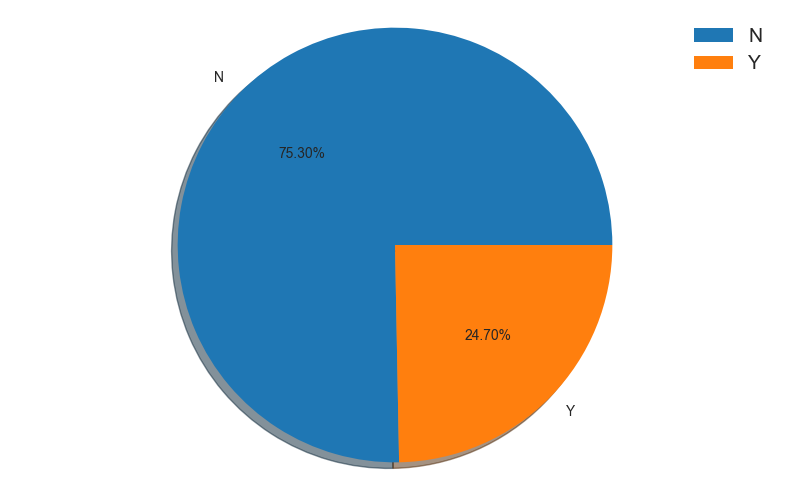

insured_sex


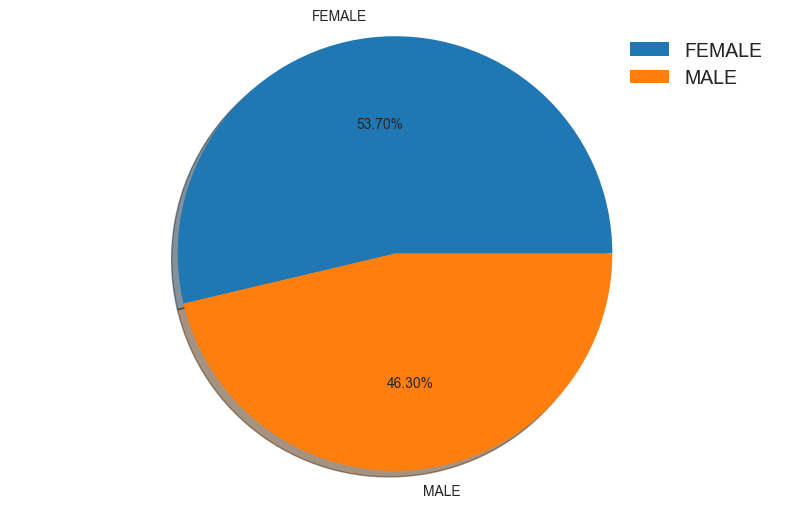

policy_state


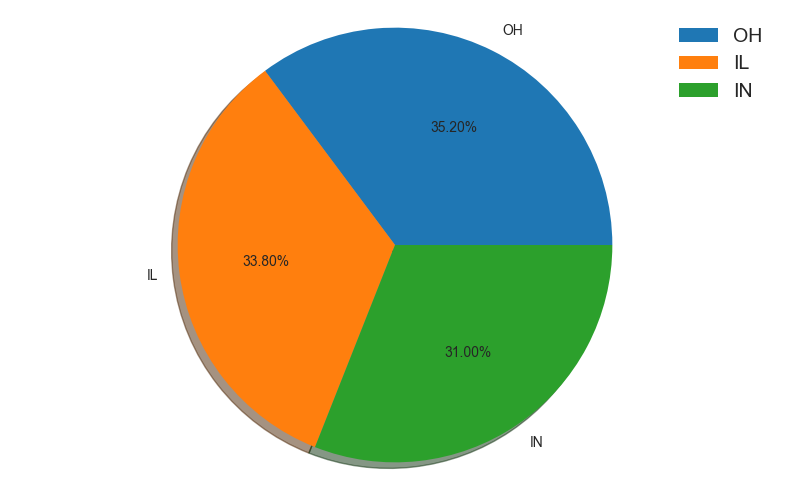

policy_deductable


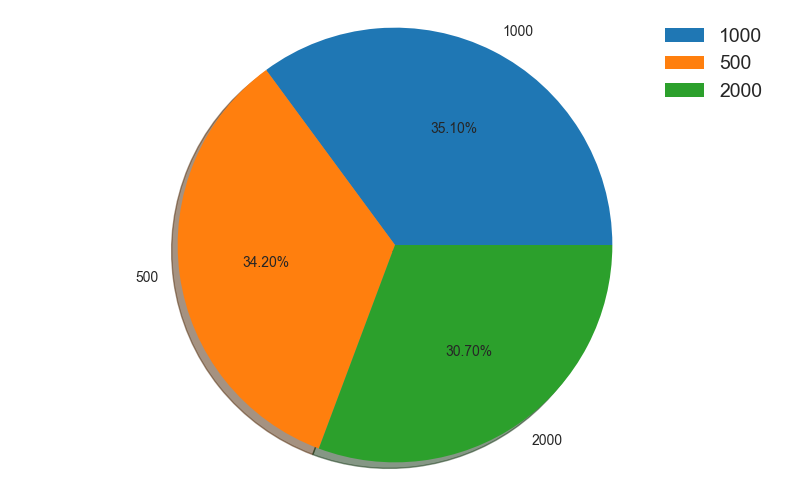

bodily_injuries


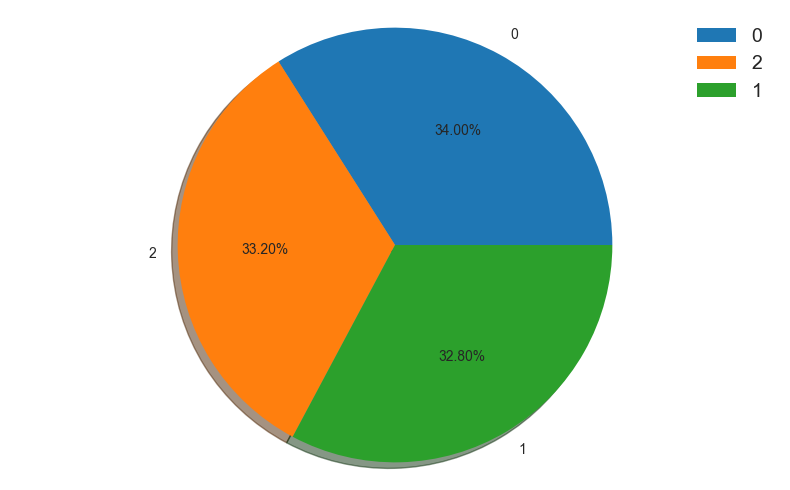

police_report_available


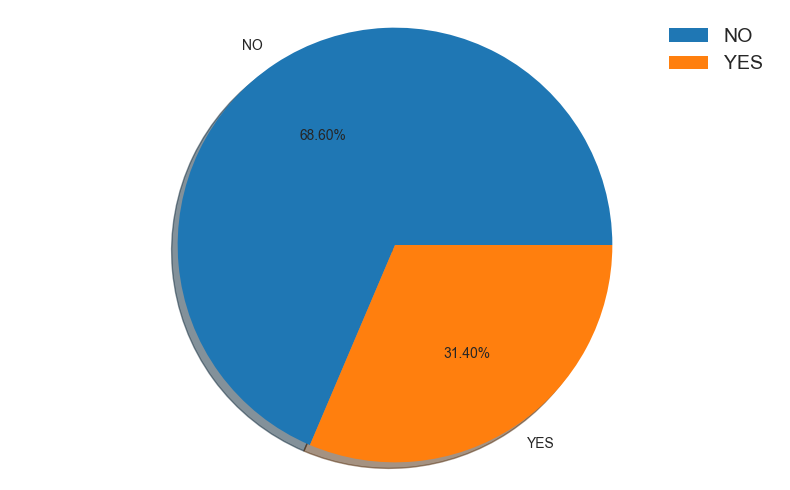

property_damage


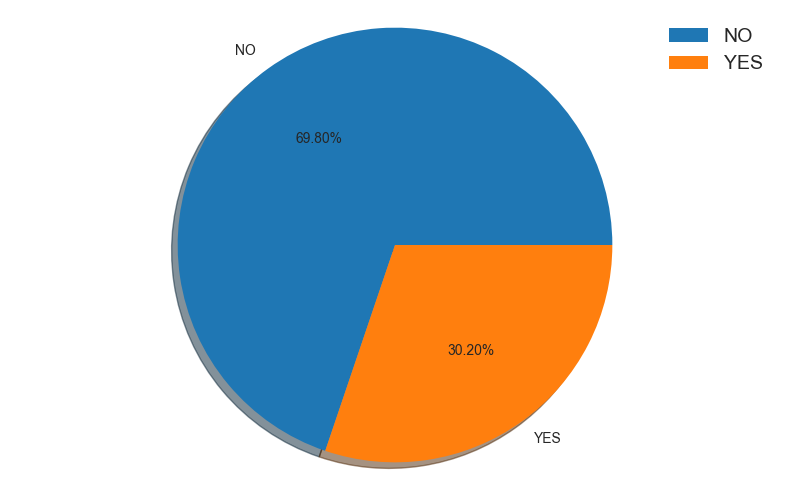

incident_type


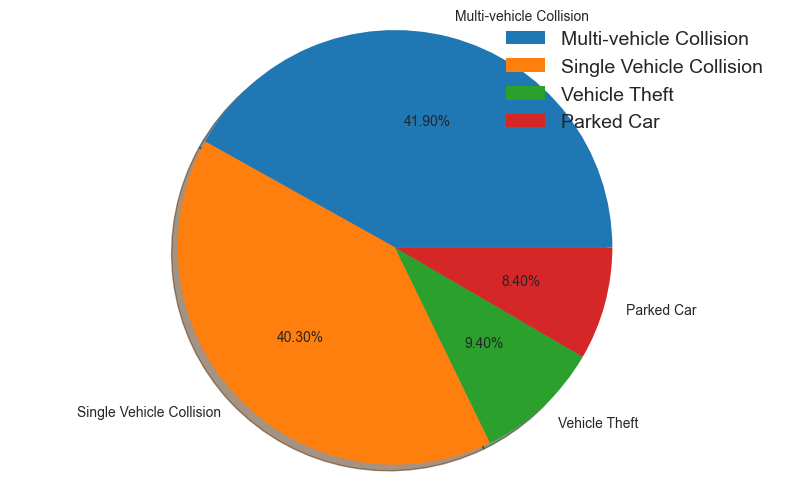

collision_type


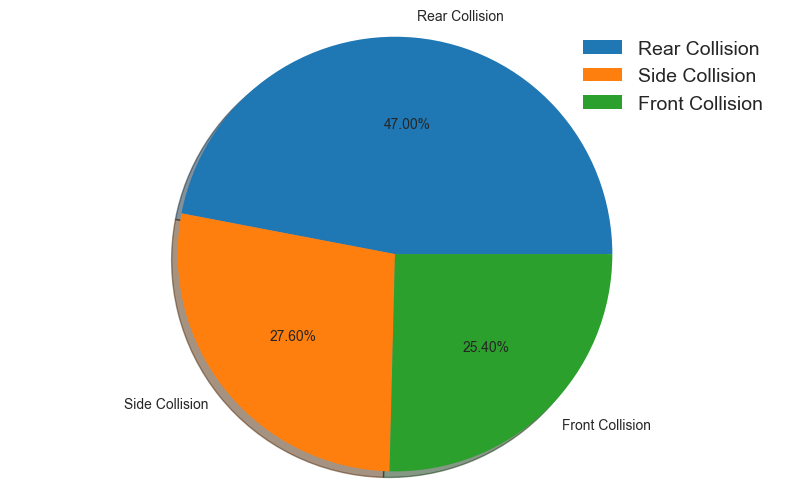

incident_severity


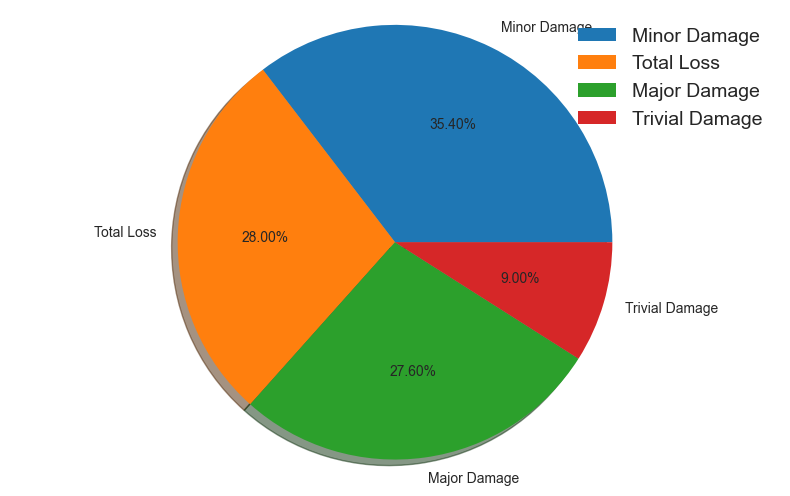

number_of_vehicles_involved


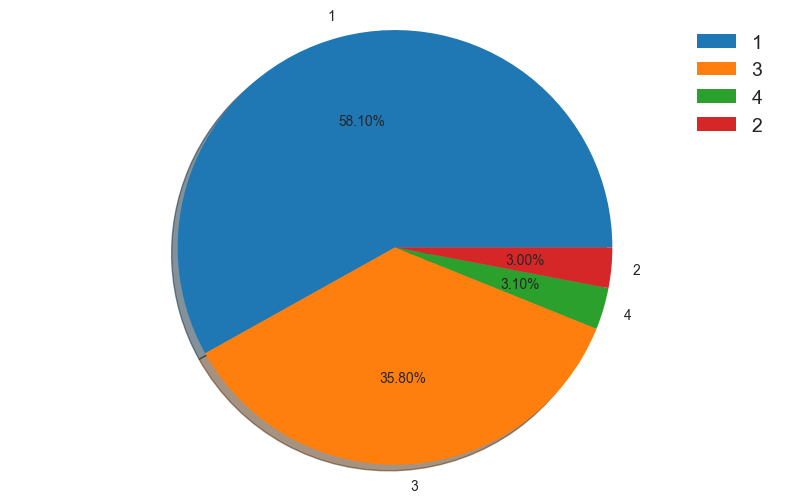

witnesses


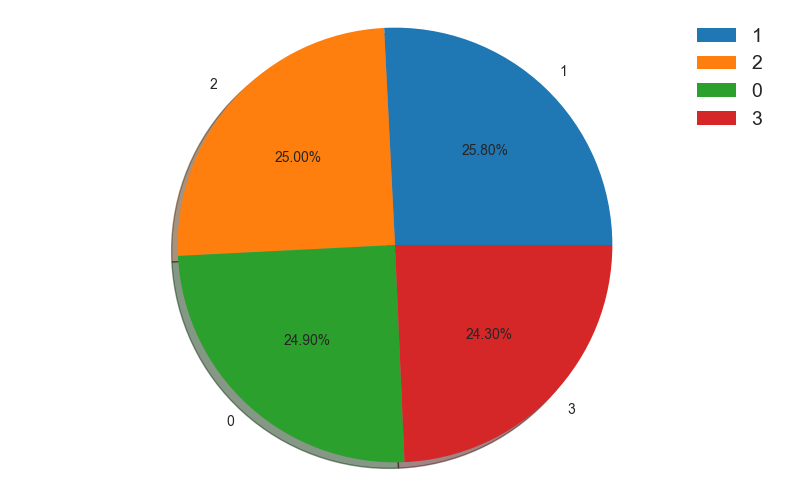

authorities_contacted


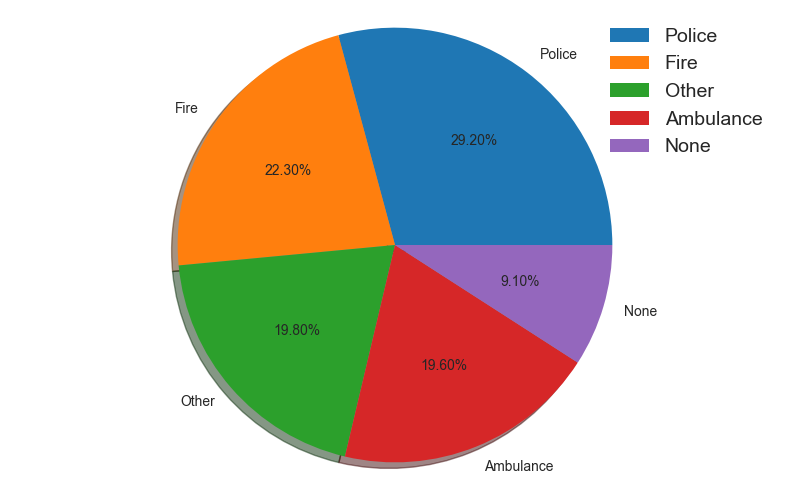

insured_relationship


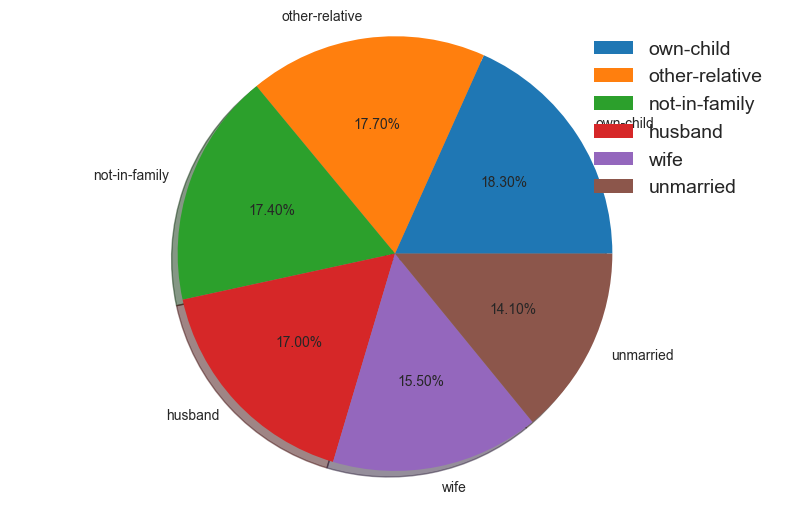

insured_education_level


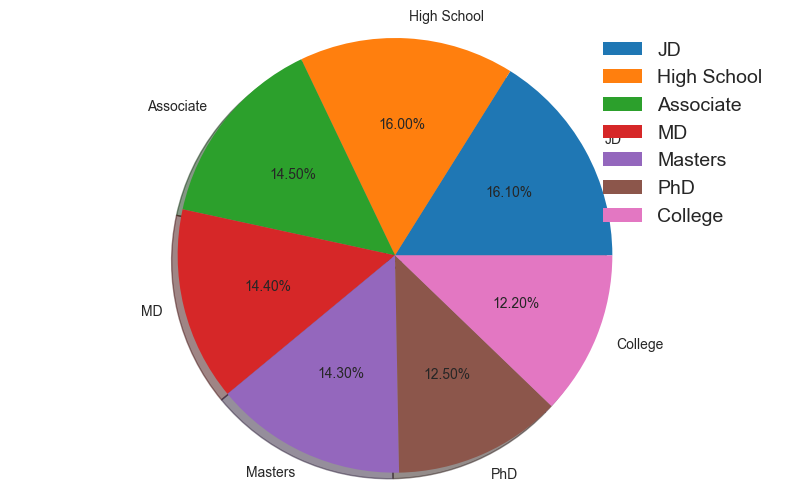

incident_state


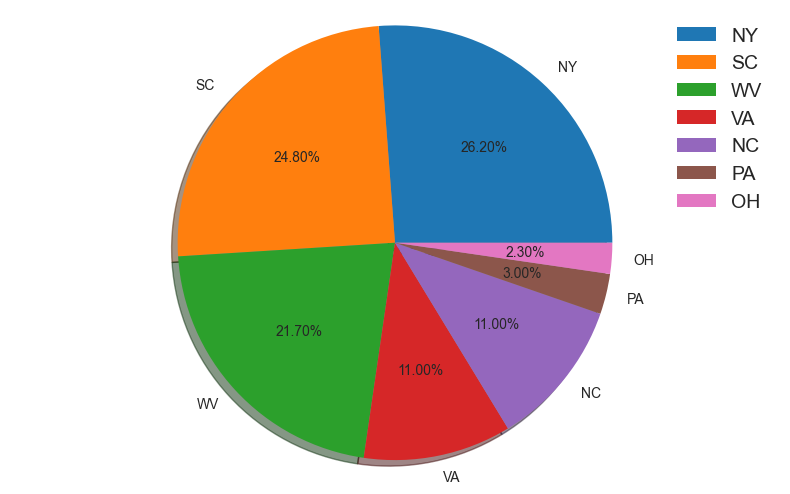

incident_city


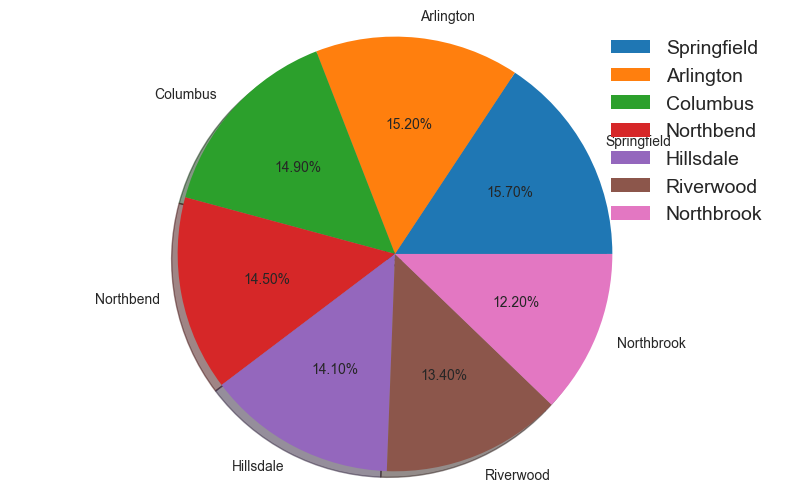

In [29]:
def Pie_Chart(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(8,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()


## These are the features with less than 10 Categorical variables
col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[col1]:
    print(i)
    Pie_Chart(df[i])

##### Observations : Features with less than 10 Unique values
- The Total number of fraud reported is far less than the fraud not reported which indicated that the dataset is Imbalanced
- Both Male and Female have insurance but Feamles have a higher insurance comapred to Males.
- policy state for Ohio is far higher as compared to Illinois and Indiana but all 3 have pretty much similar data points.
- In feature policy sections , 250/500 category has a slighty higher data coverage than the 100-300 and 500/1000 category.
- In feature policy deductable criteria we can see 1000 to be at a higher rate than it's 500 and 2000 data counterparts.
- Bodily injueries for level 0 is slightly higher than the level 2 and 1.
- for police report availability only 31.40 percent people were able to produce genuine reports while the remaining were either unable to show a report.
- In feature property damage we see 30.20 percent people suffered from property damage
- In incident severity the highest category covers for minor damages with 35.40 percent and lowest number in incident severity is of 9 percent that only has samll damage data.
- Number of vehicles being involved in an incident majorly lies for 1 and 3.
- All categories of witnesses are almost similarly distributed.
- In feature insured relationship column almost all the categorical value is equally distributed.
- IN feature incident state major portion of data is covered by New York, South Carolina and West Virginia states.
- In feature incident related city all the cities that are listed in the column have an equal share of data.

##### For features with more than 10 unique values

umbrella_limit


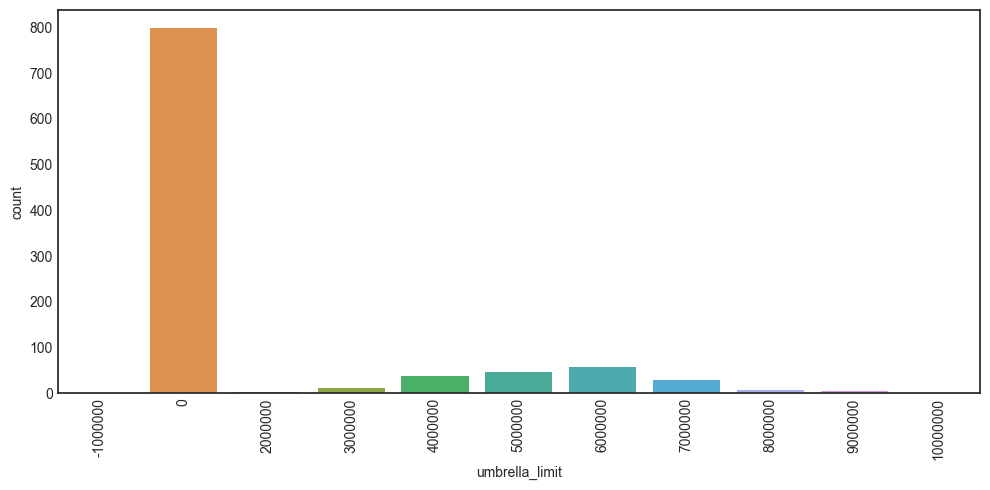

insured_occupation


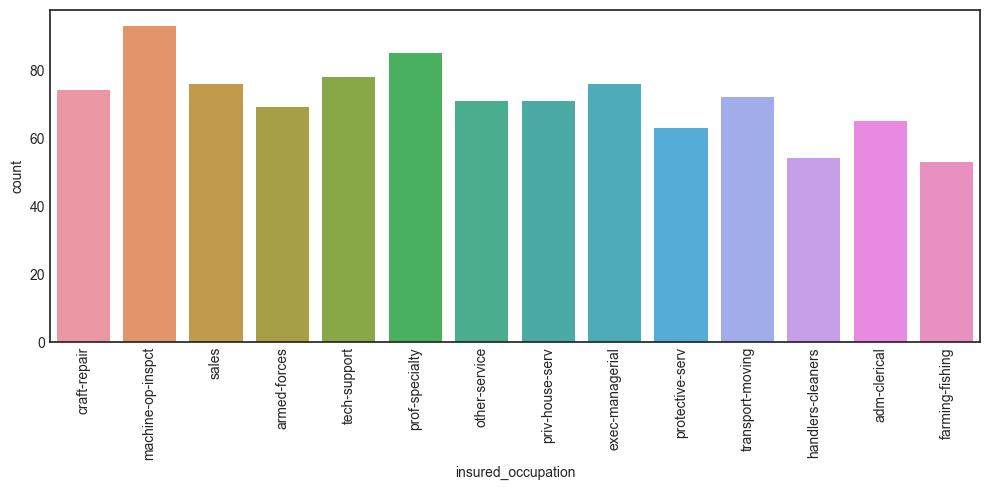

auto_make


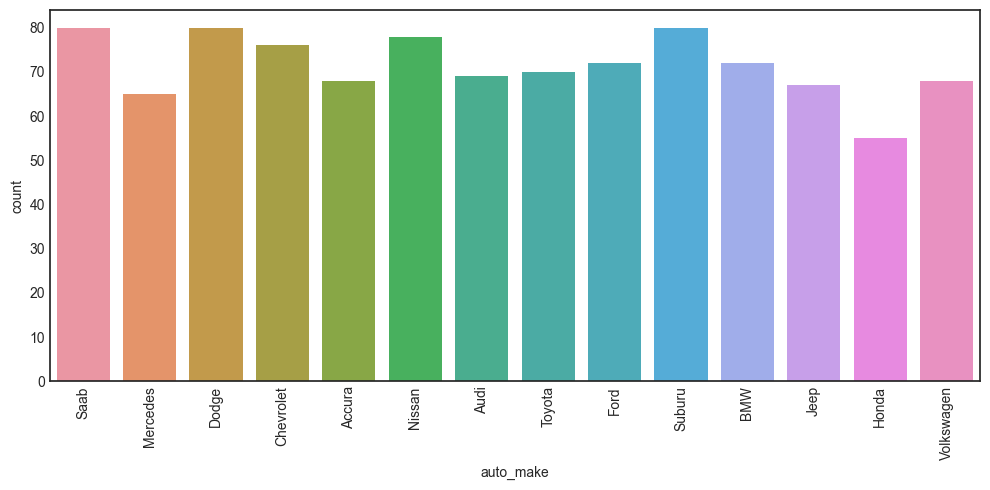

insured_hobbies


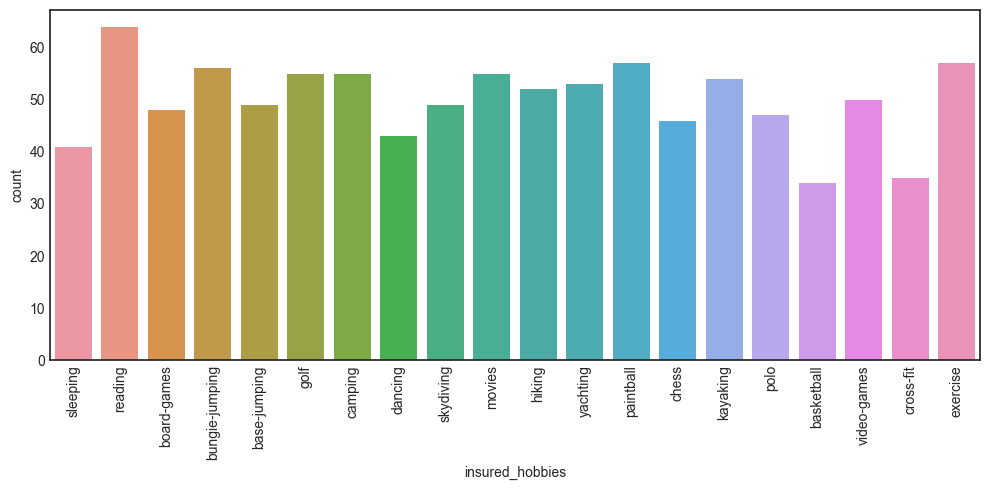

auto_model


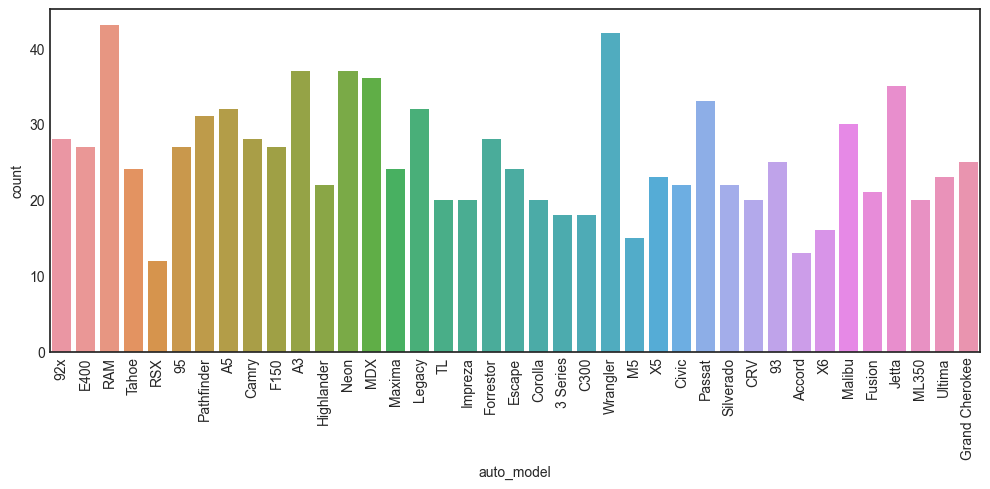

In [30]:
def Countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[col2]:
    print(j)
    Countplot(df[j])

##### Observations:
- umbrella limit is the highest for the number 0 compared to other values.
- In feature insured occupation the highest data is covered by machine operation inspector and professional speciality designations.
- In feature 'auto_make' higher scale of data for saab, dodge, nissan, suburu and volkswagen.
- In feature insured hobbbies the hihgest data is for people who like reading.
- In feature auto_model RAM and Wrangler automobile models cover highest amt of Data.

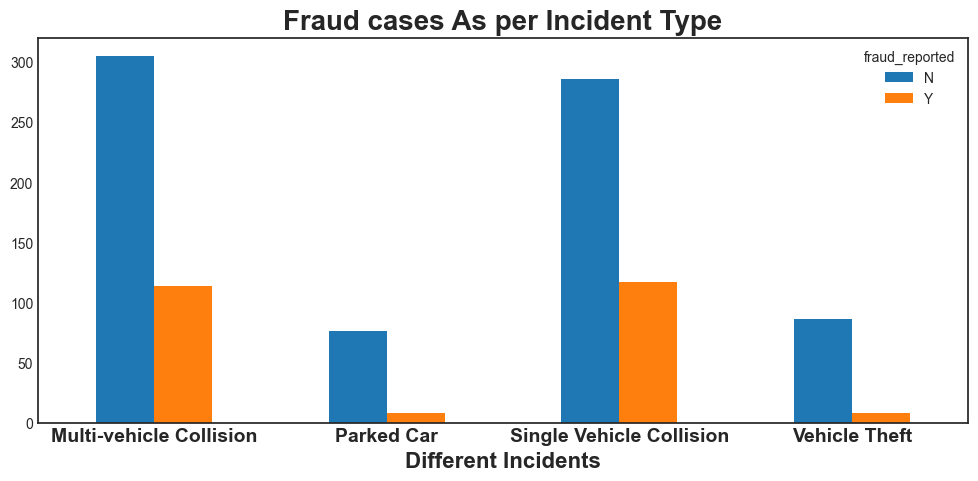

In [31]:
# let's check the insured hobbies
plt.rcParams['figure.figsize'] = (12,5)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

##### Observation :
- Multi-vehicle and single vehicle collision are involved in most of the cases.
- Some claims are due to automobile robbery.
- One claim out of three claim is fraud in multi or single vehicle collision incident.

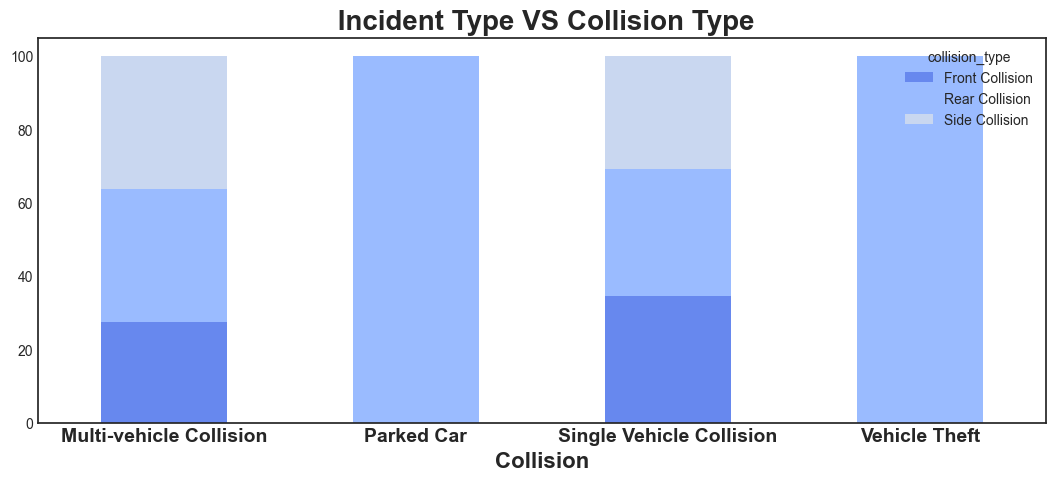

In [32]:
plt.rcParams['figure.figsize'] = (13,5)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

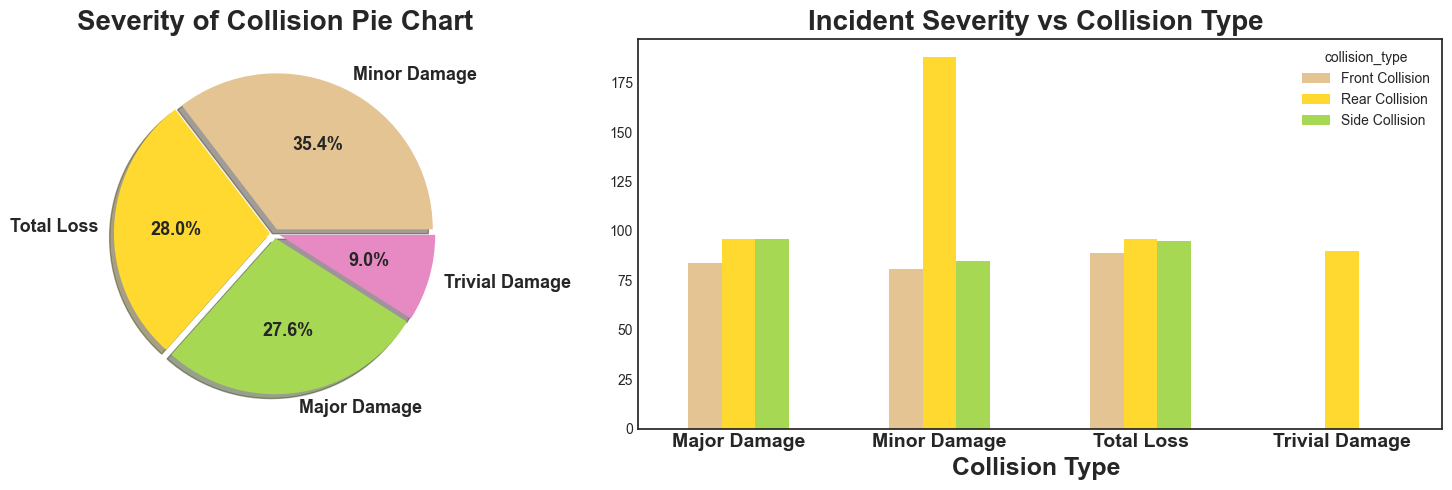

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,5))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

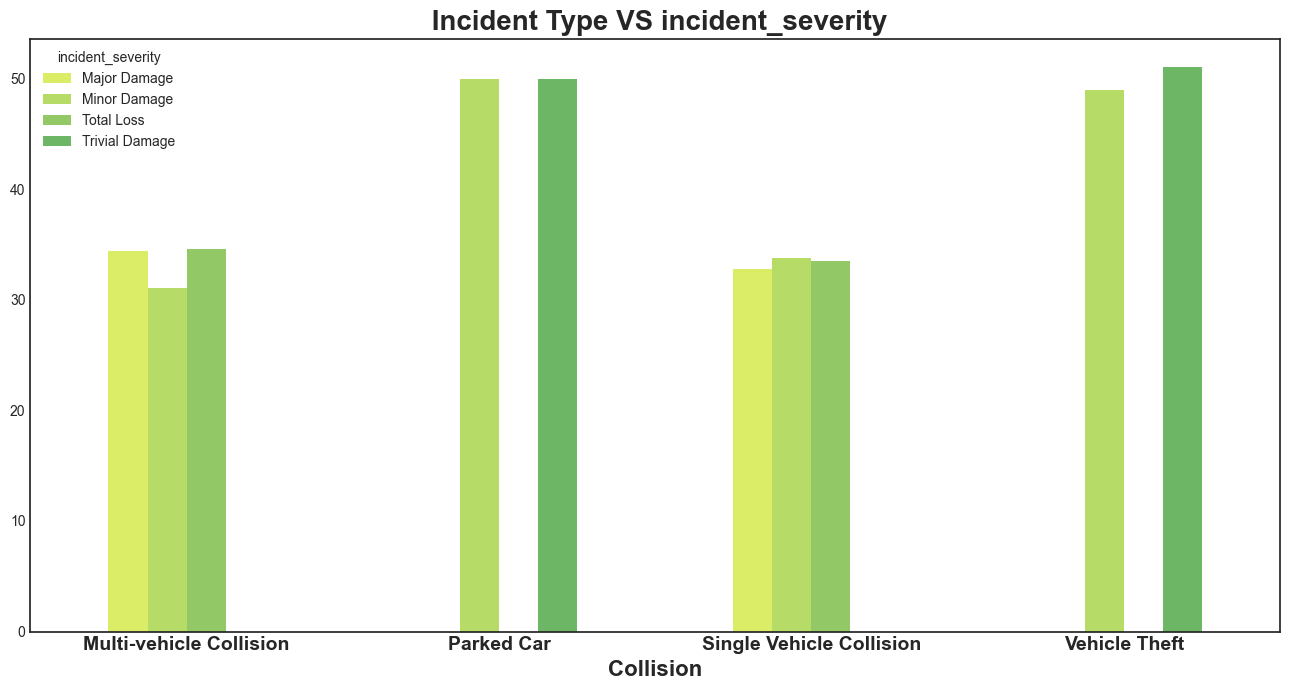

In [34]:
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

- From above the incident type has greater impact.

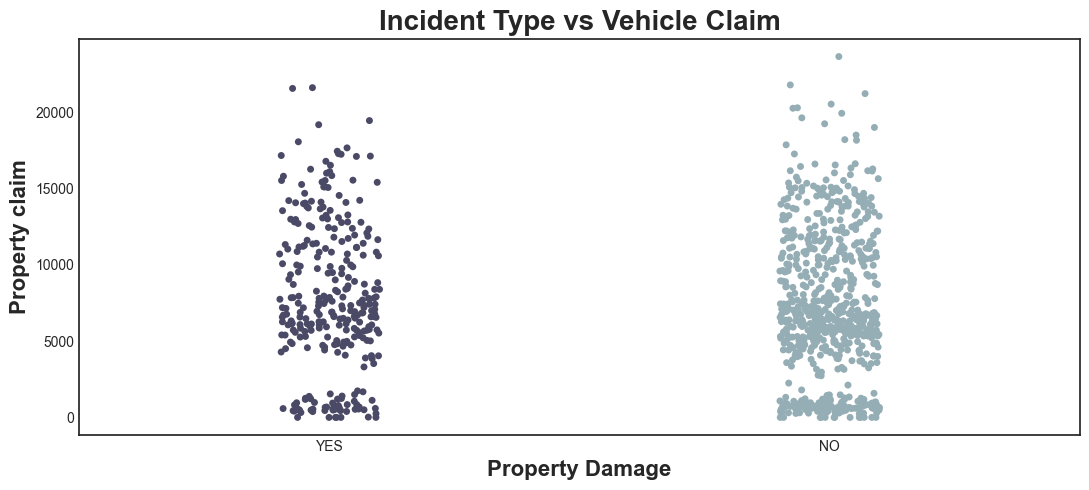

In [35]:
plt.rcParams['figure.figsize'] = (11,5)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()


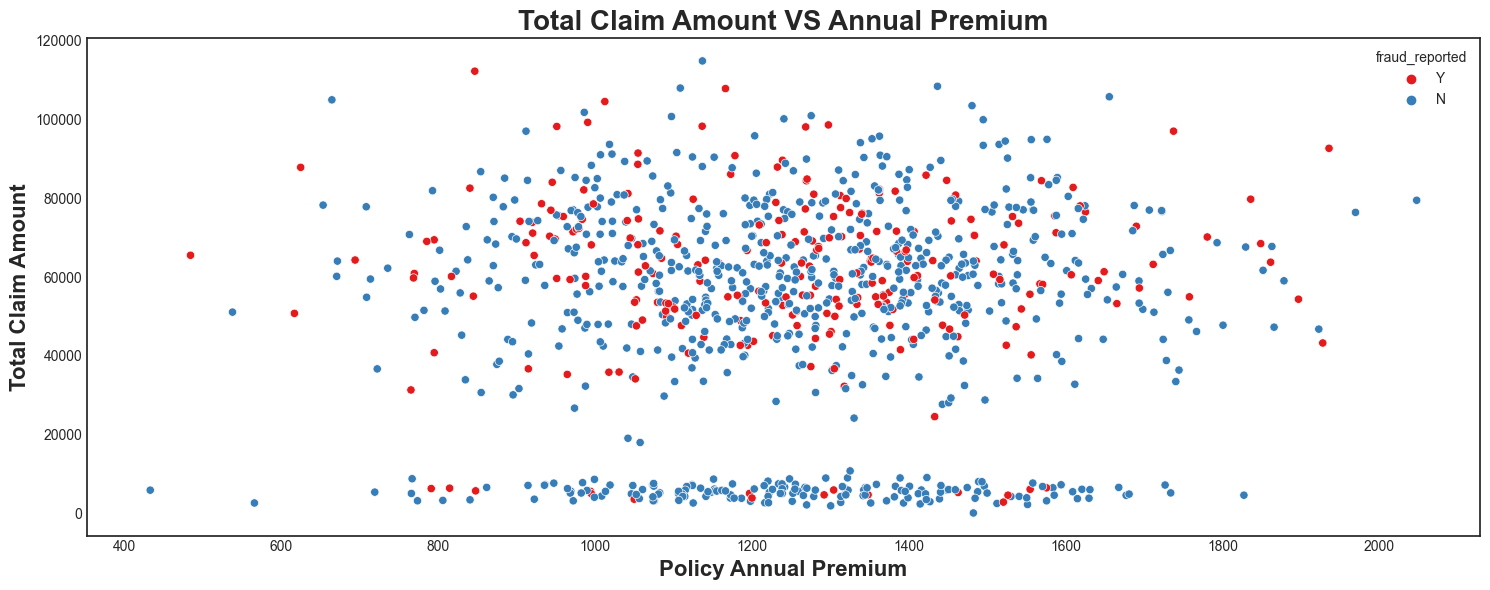

In [36]:
plt.rcParams['figure.figsize'] = (15,6)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

## Feature Engineering

### Encoding categorical data

In [37]:
Categorical_Data = [feature for feature in df.columns if df[feature].dtypes == 'O']
df[Categorical_Data].head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental
0,OH,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y,250,500
1,IN,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,E400,Y,250,500
2,OH,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N,100,300
3,IL,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe,Y,250,500
4,IL,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N,500,1000


In [38]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in Categorical_Data:
    df[i] = label.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,CSL_Personal,CSL_Accidental,Automobile_Age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,17,10,2014,25,1,1,2,11
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,27,6,2006,21,1,1,2,8
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,9,6,2000,22,2,0,1,8
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,25,5,1990,1,10,1,2,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,6,6,2014,17,2,2,0,6


- We have encoded all the Categorical features

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

- there are no Object datatype columns and therefore we have succesfully encoded all the Categorical features

### Outlier Detection

In [40]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 'incident_Month', 'Automobile_Age','policy_annual_premium']


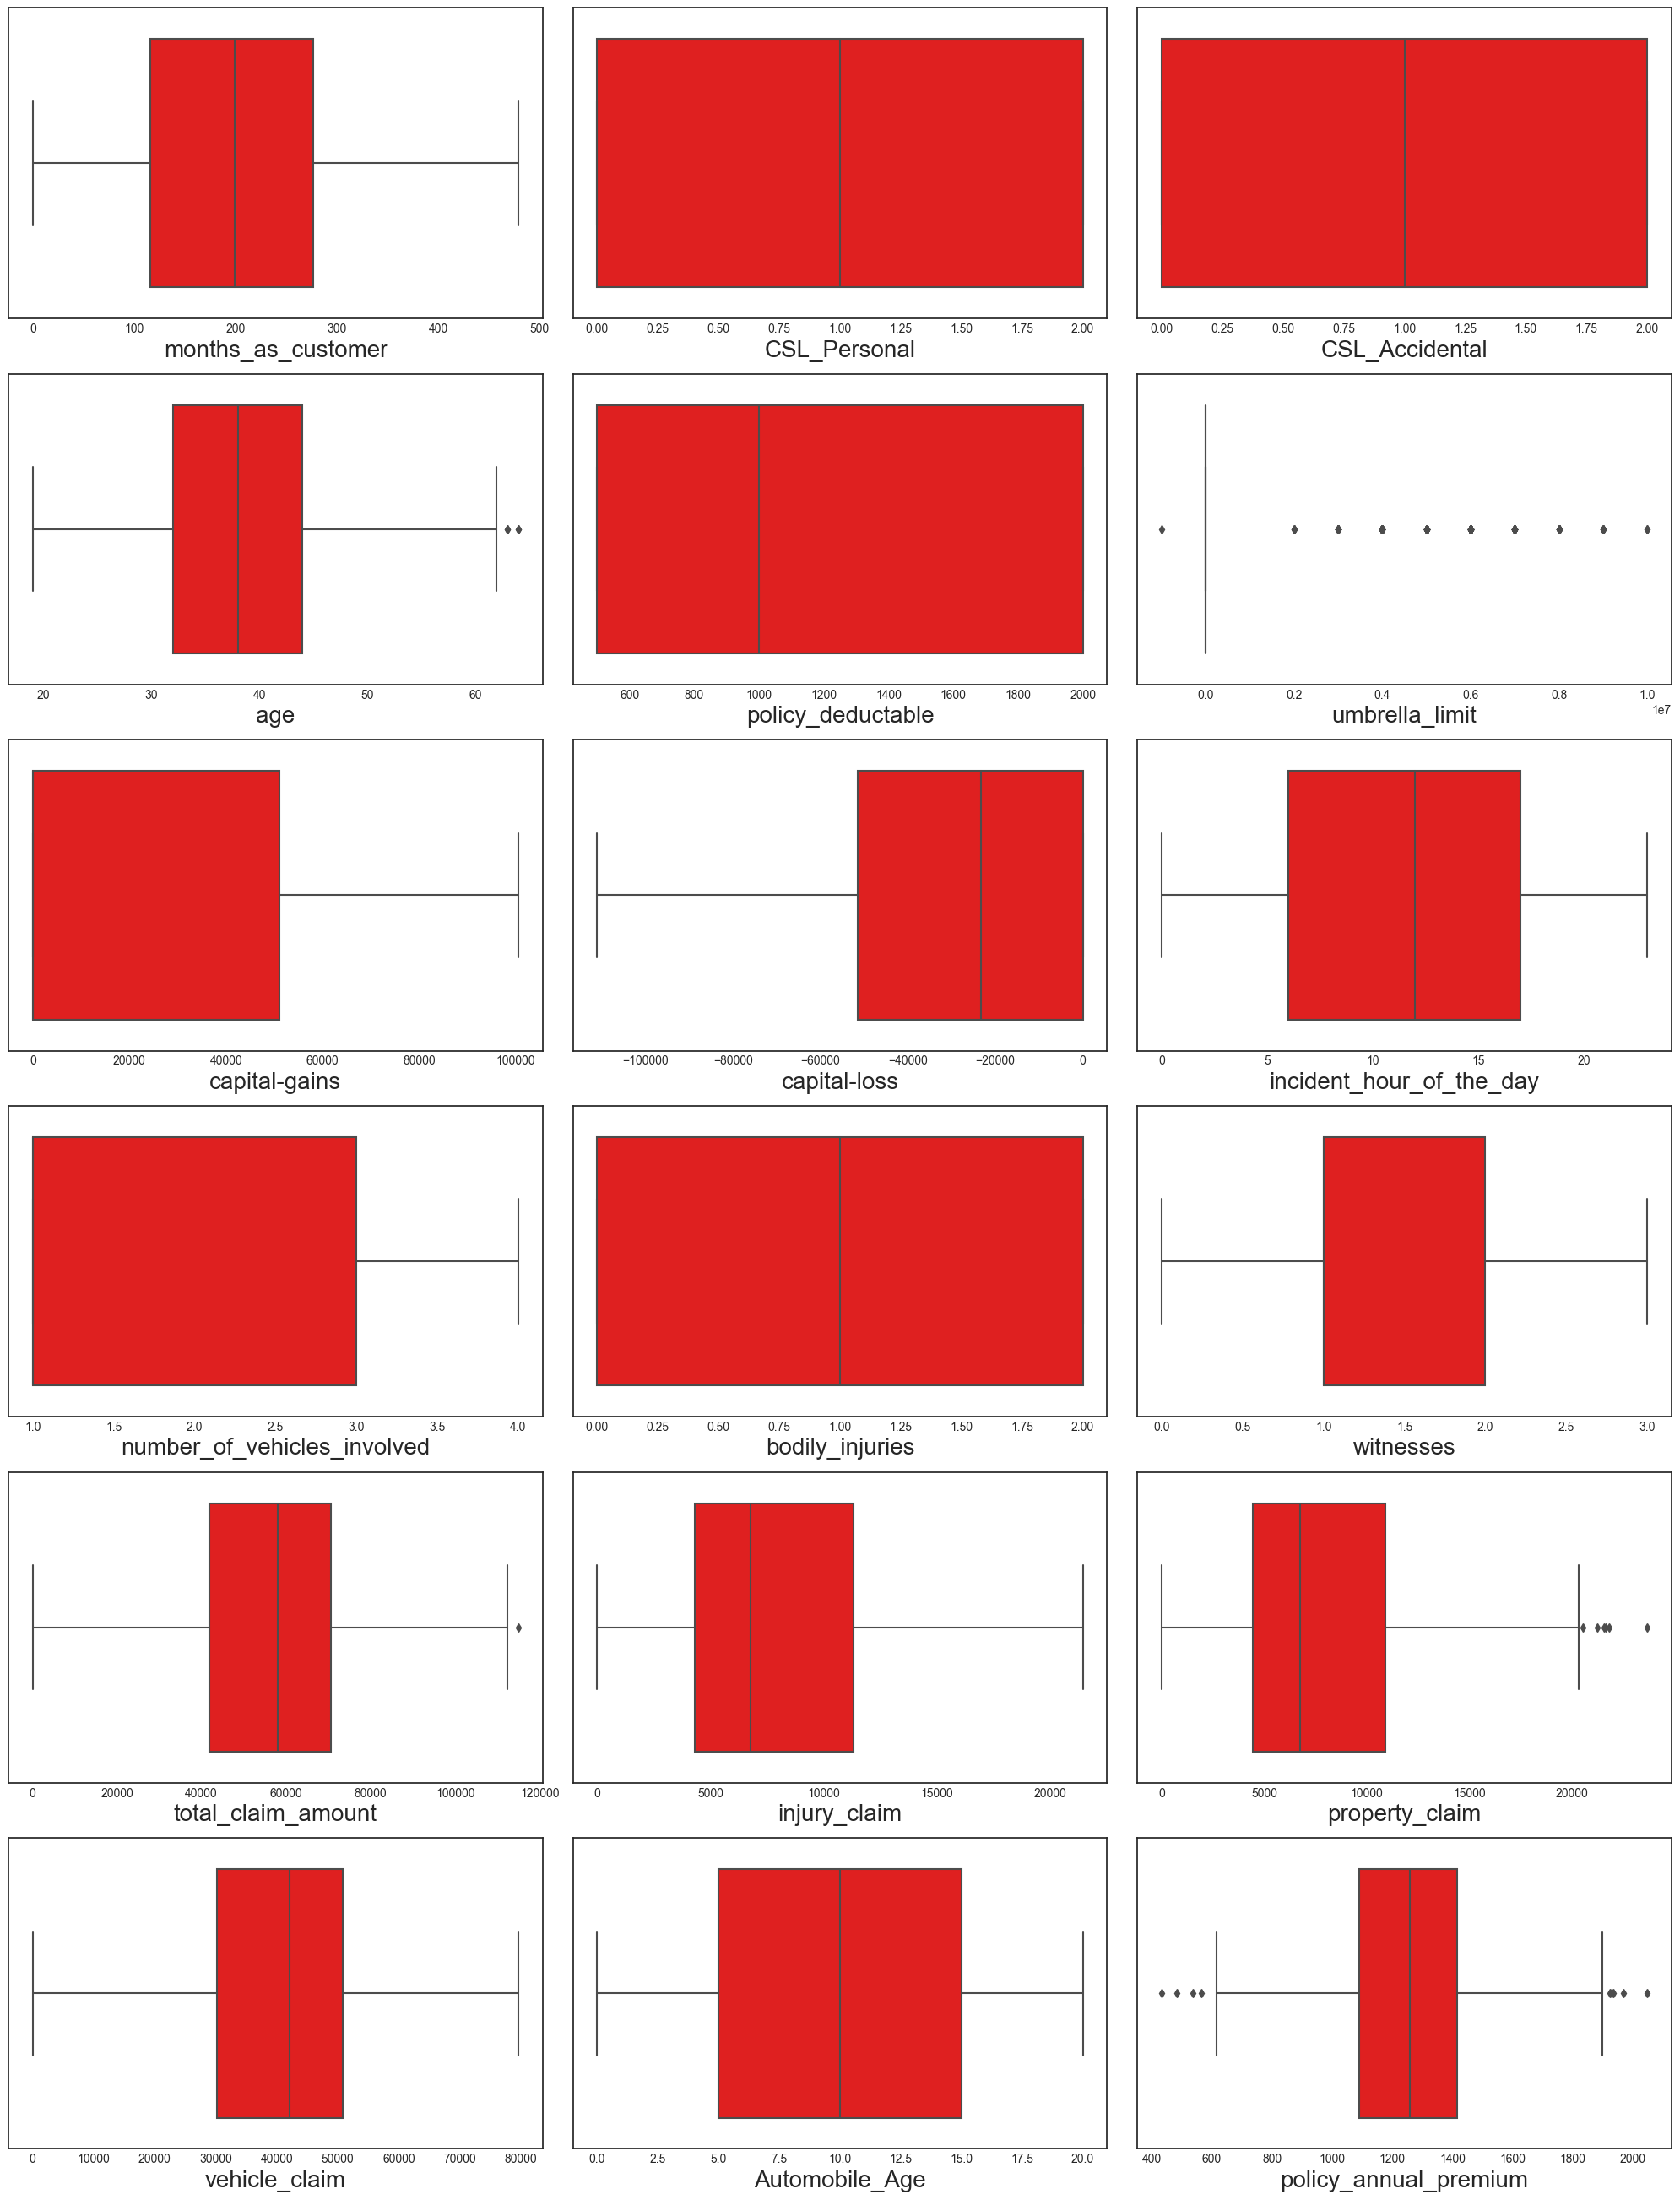

In [41]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical_features:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


### Outlier Removal

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


- The Data loss after Outlier Removal is only 2% which is within acceptable data range

### Skewness

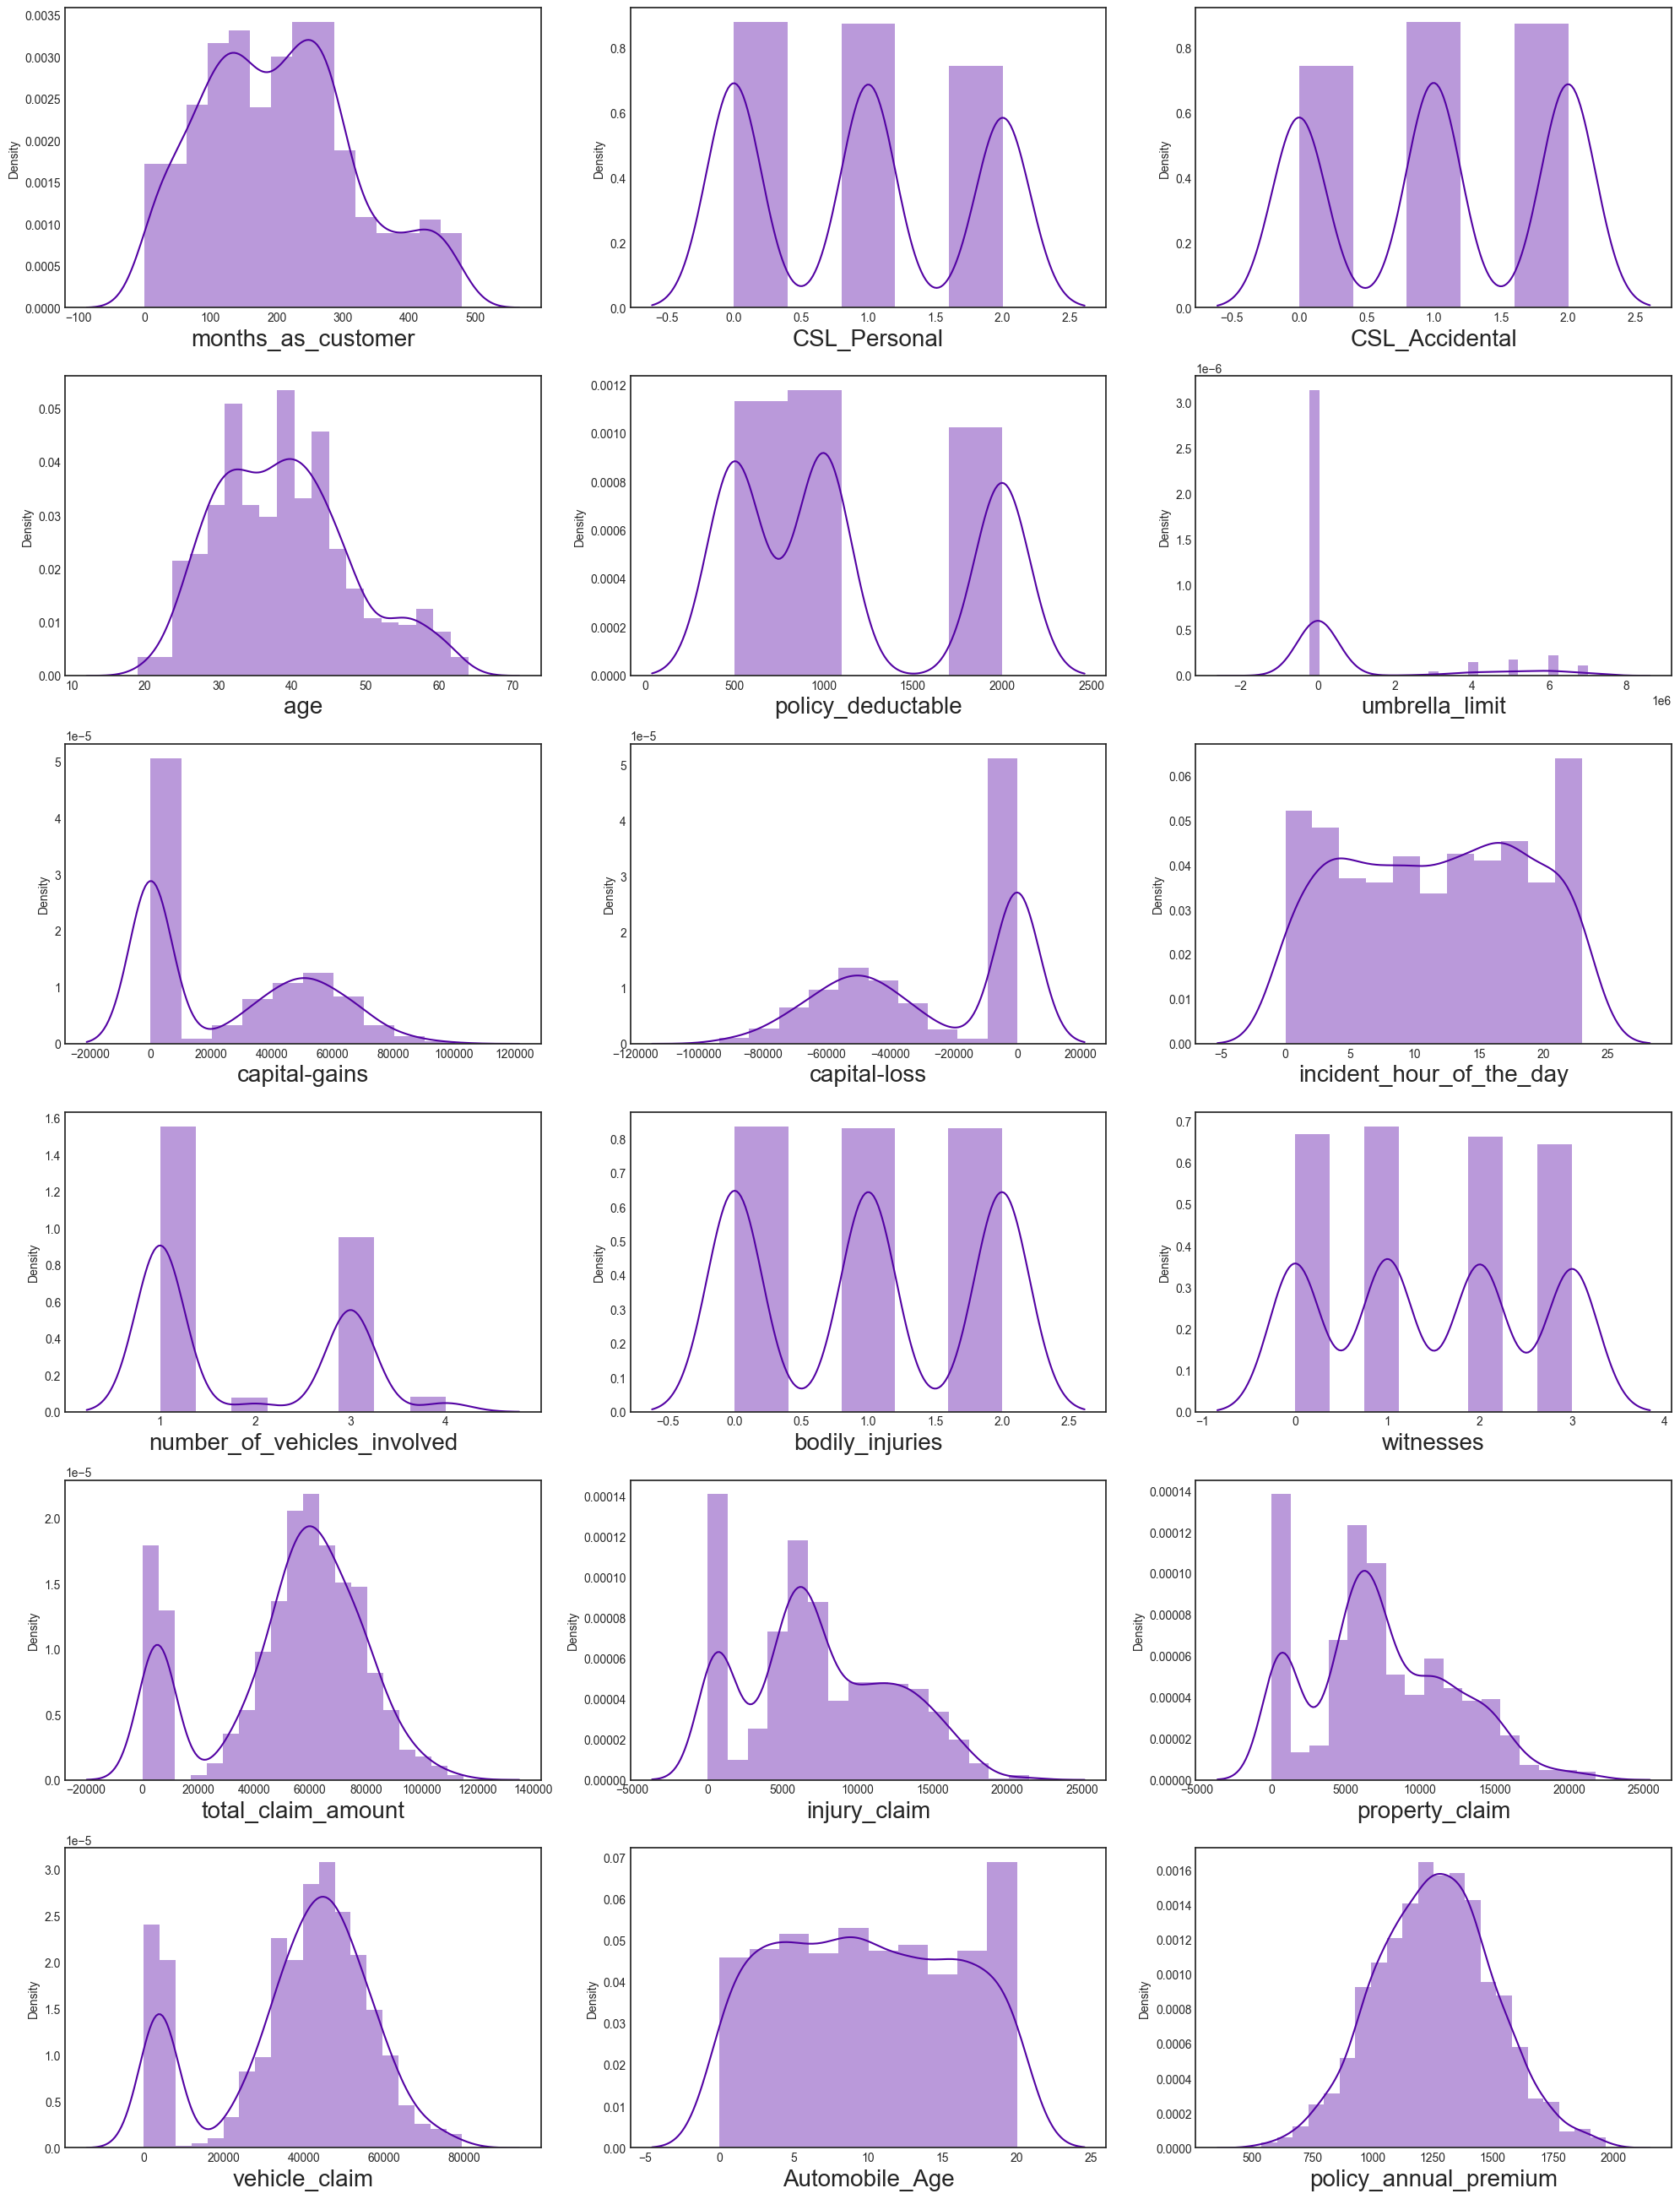

In [43]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical_features:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- There seems to be Skewness in our Numerical Features which needs to be removed

In [44]:
df[Numerical_features].skew()

months_as_customer             0.362608
CSL_Personal                   0.098248
CSL_Accidental                -0.094370
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

In [45]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [46]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

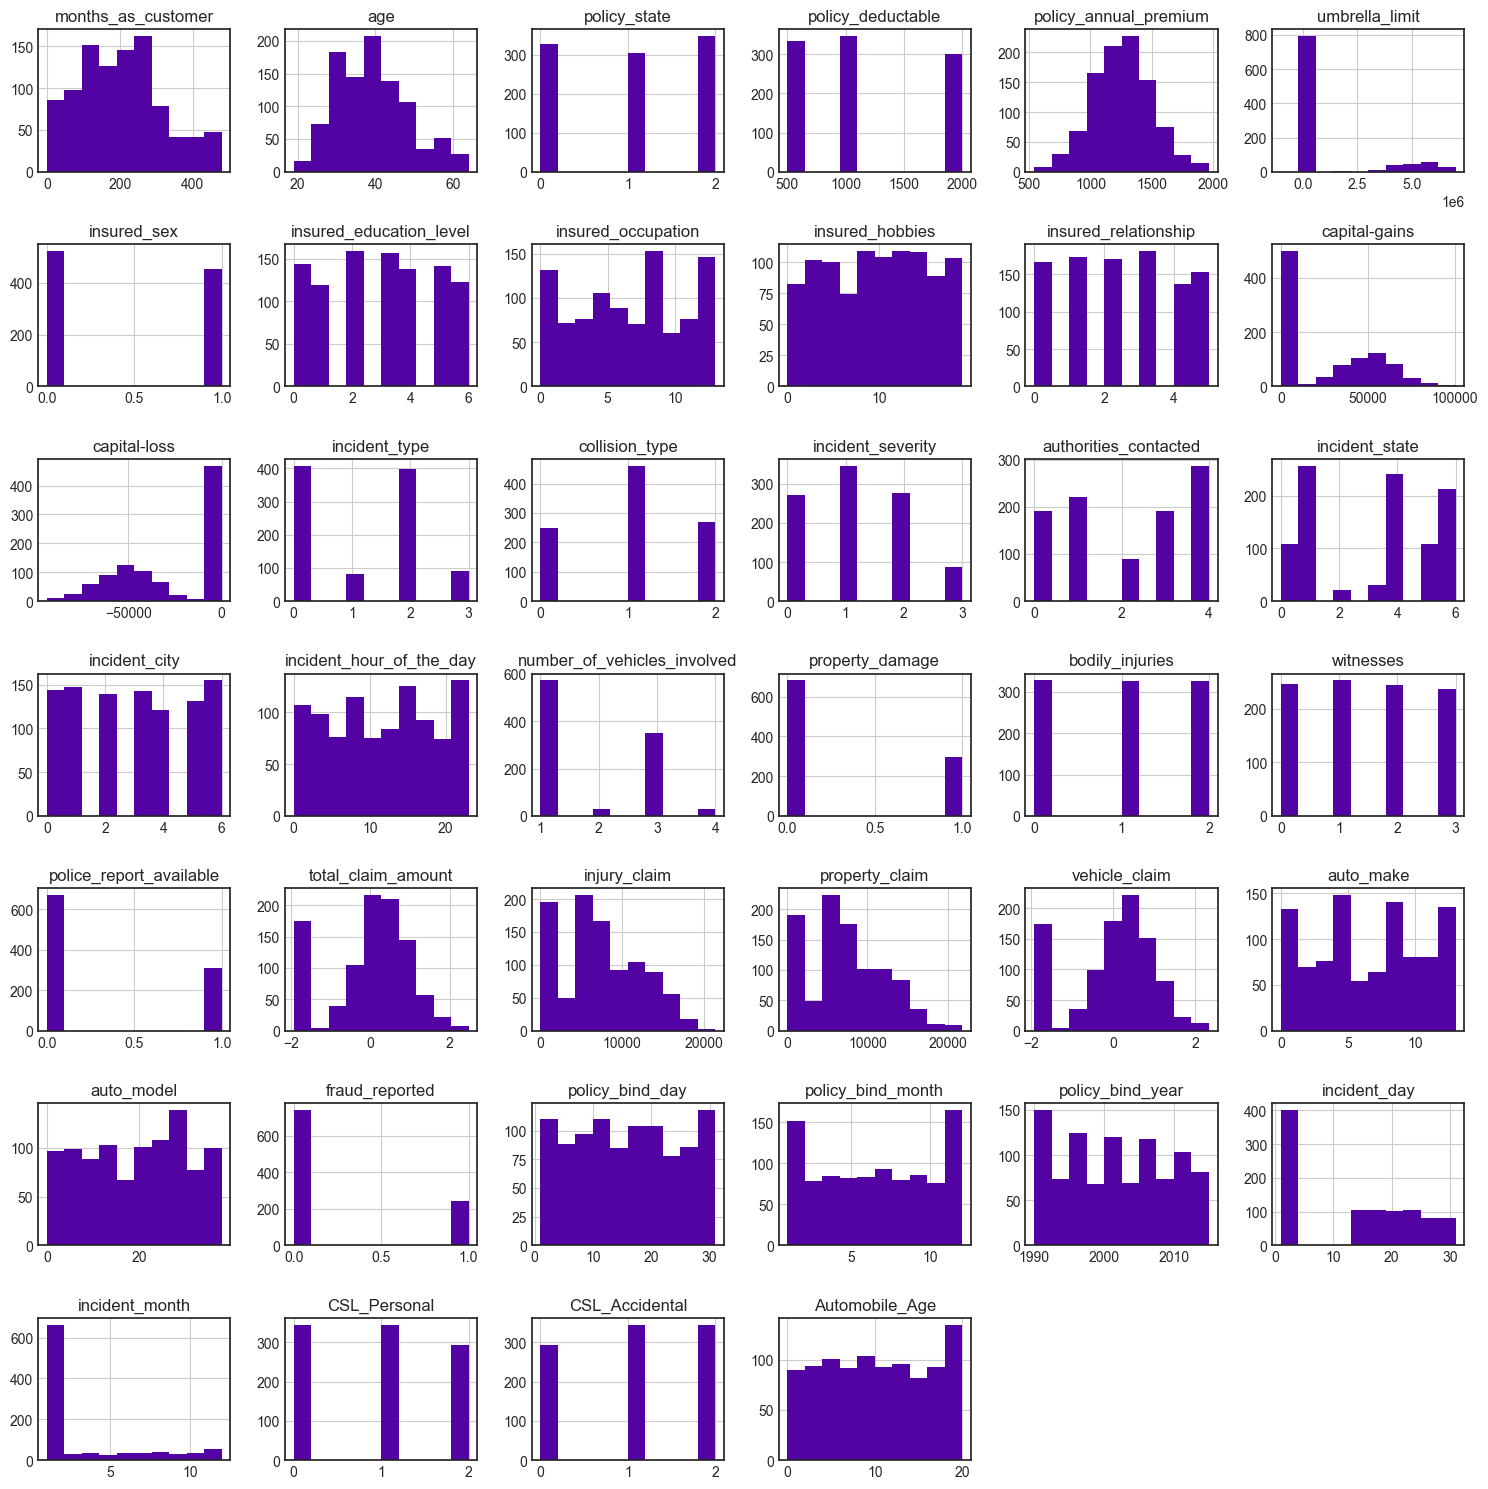

In [47]:
df.hist(figsize=(15,15))
plt.show()

### Correlation

In [48]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,CSL_Personal,CSL_Accidental,Automobile_Age
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.018213,0.059644,-0.000731,0.006925,-0.089358,0.071492,0.007468,0.023041,-0.016746,-0.073031,-0.064094,0.013782,0.015811,-0.006601,0.066198,0.011831,-0.000630,-0.007674,0.063574,-0.017200,0.059338,0.065062,0.036660,0.056360,0.049734,0.005130,0.021285,0.050824,0.004207,-0.041914,-0.010538,0.019242,-0.021855,0.007121,-0.000869
age,0.922960,1.000000,-0.020012,0.032036,0.005330,0.013256,0.073790,0.001647,0.014798,-0.079099,0.076129,-0.004529,0.012860,-0.026286,-0.076325,-0.064396,0.018441,0.012644,-0.006685,0.083720,0.020391,-0.008239,-0.012254,0.056360,-0.018135,0.068448,0.077149,0.062375,0.059129,0.033757,0.015322,0.013279,0.053147,0.014492,-0.031709,-0.005843,0.018221,-0.013323,0.011258,-0.005594
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.010921,-0.018002,-0.027173,-0.025357,-0.039501,-0.017060,0.068619,-0.031926,0.032373,0.049961,-0.028353,-0.014647,0.019456,-0.002809,0.021926,-0.045514,-0.013576,0.012097,0.025838,0.065316,-0.015056,-0.048188,-0.006420,-0.006411,0.010259,-0.018008,0.034587,-0.000583,0.073692,-0.003045,0.016049,0.027889,0.001653,0.029007,0.001160
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.013471,-0.006977,0.014101,-0.053888,-0.001923,-0.019000,0.031673,-0.019601,-0.032291,-0.055984,-0.016363,0.002769,0.000647,-0.047304,0.064732,0.046331,0.013074,-0.037263,0.071709,0.036275,0.024385,0.038459,0.071031,0.004874,-0.028032,-0.002591,0.015774,0.013395,-0.054208,-0.054041,-0.018115,-0.010288,0.009912,-0.014554,-0.030569
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.014107,0.041312,-0.021400,0.027827,-0.014226,0.004417,-0.006807,0.033133,0.051606,0.032604,-0.013911,-0.054425,0.048647,0.047771,-0.006448,-0.044544,0.076447,0.027837,0.003433,0.032413,-0.000944,-0.024119,-0.014073,0.009194,0.009311,-0.038226,-0.012686,-0.032681,-0.031608,0.002433,0.018671,0.009544,0.032654,-0.001868,0.042446
umbrella_limit,0.018213,0.013256,-0.010921,0.013471,-0.014107,1.000000,0.018068,-0.030887,0.003973,-0.034098,0.095972,-0.022753,-0.025844,0.034951,0.008716,-0.001297,0.022396,-0.081479,0.039685,-0.022571,-0.041298,-0.083258,0.047719,-0.001363,-0.036754,-0.047400,-0.046298,-0.021380,-0.048842,0.012857,0.015360,0.044729,-0.030416,-0.001072,0.049032,-0.031948,0.029210,0.013504,0.025418,-0.027952
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.018068,1.000000,0.010068,-0.007440,-0.020928,0.004488,-0.019824,-0.030319,0.009540,-0.019044,-0.021242,0.019423,-0.022522,0.009957,0.012904,0.018852,0.032636,-0.015199,0.039343,0.014179,-0.016933,0.008472,-0.008744,-0.023597,0.019996,-0.018657,0.020582,0.047690,-0.003125,-0.031230,-0.017208,0.036916,-0.003405,0.071995,0.033336
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.030887,0.010068,1.000000,-0.025394,0.025229,-0.028673,0.044276,0.037070,0.005854,-0.022368,-0.010929,-0.015500,-0.007821,-0.022502,-0.053983,0.003279,-0.050922,-0.017959,0.021747,0.055785,0.079642,0.086600,0.062230,0.072650,0.060043,0.042735,0.013116,0.018977,-0.011963,0.016874,-0.051772,0.069564,0.008337,-0.005150,-0.054438
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.003973,-0.007440,-0.025394,1.000000,-0.010375,-0.012135,0.000409,-0.016182,0.003755,0.012390,-0.000513,-0.000998,-0.020759,0.003112,-0

- Lets check the correlation Heatmap

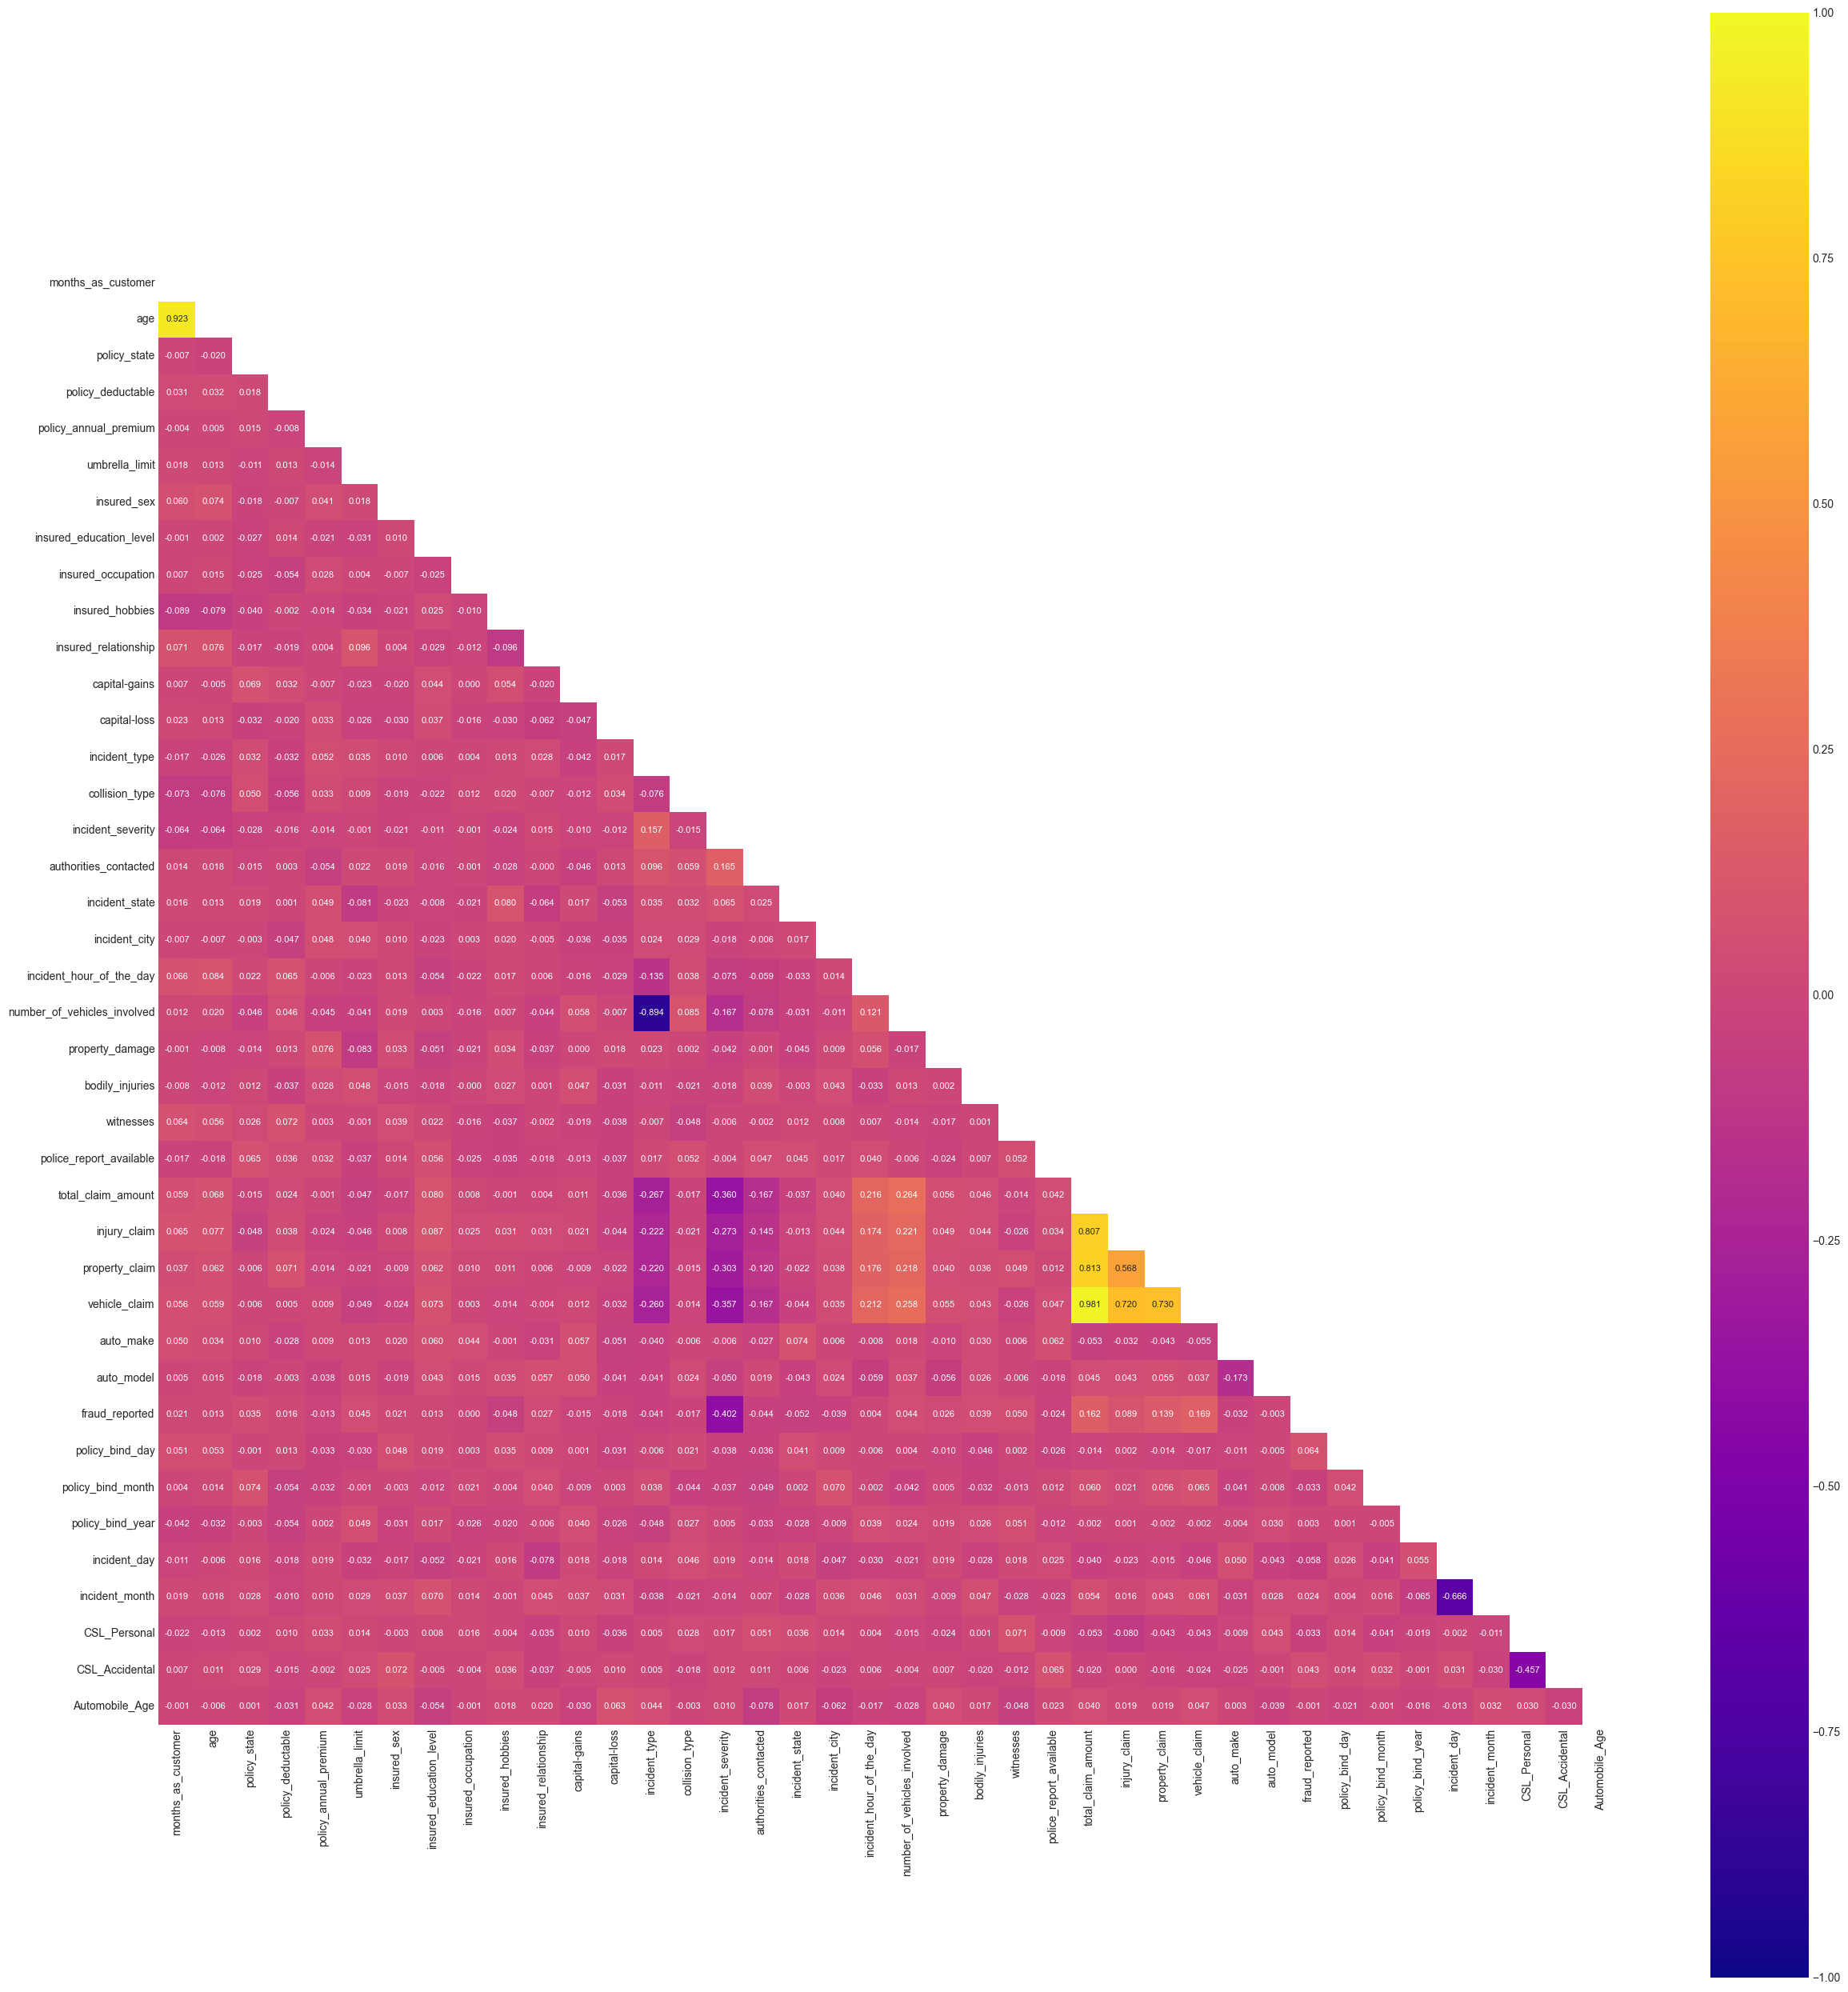

In [49]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

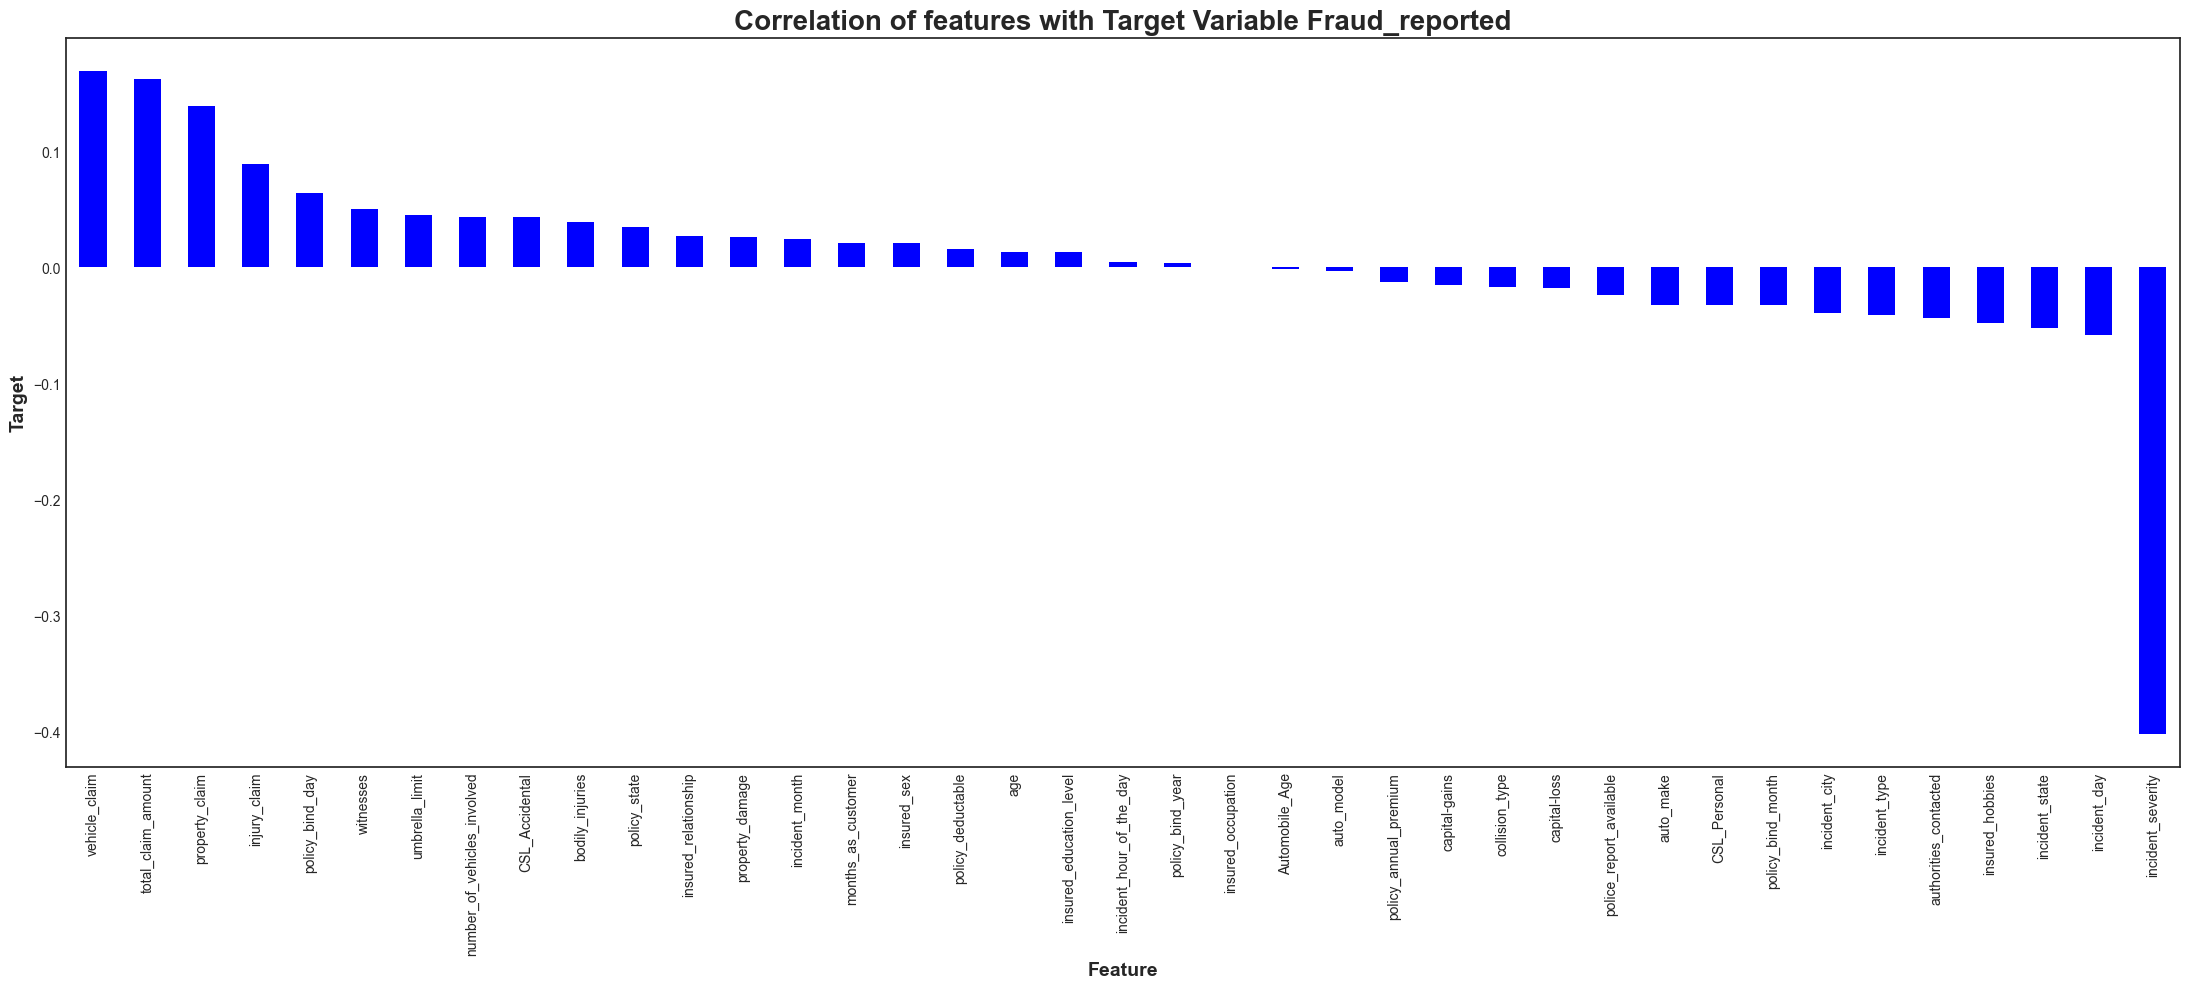

In [50]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

In [51]:
df.dropna(inplace=True)

- We can see the correlation between Independent features and our Target feature

##### Observation
- incident_severity is correlated with target variable with negative correlation of 0.4. Other variable are poorly correlated with target variable.
- injury_claim,property_claim,vehicle_claim are highly correlated with each other
- incident_hour_of_the_day is highly negative correlated with incident type.

### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [52]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [53]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

- The dataset is highly Imbalanced

In [54]:
## Using SMOTE to Balance the Dataset
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [55]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,CSL_Personal,CSL_Accidental,Automobile_Age
0,1.123306,1.055305,1.344121,-0.271917,0.645243,-0.484184,1.214461,0.649397,-1.163134,1.410780,-1.441686,1.027119,0.996434,0.905167,1.578975,-0.957286,1.350463,0.462985,-0.913494,-1.050784,-0.793901,1.796823,0.142287,0.570883,1.800191,0.682707,-0.267676,1.156159,0.721756,0.974326,-1.710845,0.170159,1.135046,1.852432,1.256250,-0.741238,0.242642,1.351293,0.240824
1,0.209351,0.366405,0.089043,1.433775,-0.263940,1.805552,1.214461,0.649397,-0.112996,1.038430,-0.184352,-0.899558,0.996434,1.883012,0.166961,0.116035,1.350463,0.958084,1.137277,-0.588764,-0.793901,-0.556538,-1.133985,-1.338511,-0.555497,-2.066195,-1.511768,-1.539851,-2.080813,0.445054,-0.656224,1.368232,-0.109762,0.692887,0.850433,-0.741238,0.242642,1.351293,-0.284610
2,-0.649767,-1.126212,1.344121,1.433775,0.672255,1.805552,-0.823410,1.740326,1.199676,-1.381847,0.444314,0.369229,0.996434,-1.050523,0.166961,0.116035,1.350463,-1.022314,-0.913494,-0.742771,1.317462,-0.556538,1.418559,1.525579,-0.555497,-0.897427,-0.009304,-0.863646,-1.015941,-0.613491,1.069521,-0.788300,-0.109762,-0.176772,0.951888,-0.417152,-1.063214,0.052648,-0.284610
3,0.465259,0.251588,-1.166035,1.433775,0.683528,2.263499,-0.823410,1.740326,-1.425668,-1.381847,1.072981,0.868068,-1.266584,0.905167,-1.245053,-0.957286,1.350463,-0.527214,-1.426186,-1.050784,-0.793901,-0.556538,0.142287,0.570883,-0.555497,0.324962,-0.304586,-0.315193,0.637757,-0.878127,1.453020,1.128618,-0.420964,-1.626203,-1.178652,2.175539,0.242642,1.351293,-1.510620
4,0.209351,0.596038,-1.166035,-0.271917,1.412687,2.263499,1.214461,-1.532460,1.199676,-1.381847,1.072981,1.486195,-0.671817,1.883012,0.166961,0.116035,-0.018499,-1.022314,-1.426186,1.259318,-0.793901,-0.556538,-1.133985,-0.383814,-0.555497,-2.014214,-1.398866,-1.568485,-2.029484,-1.672036,1.165396,-1.147722,-0.109762,1.852432,0.444616,-0.417152,1.548499,-1.245998,-0.634898


### Checking Multicollinearity between features using variance_inflation_factor

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.429158,months_as_customer
1,7.376246,age
2,1.062977,policy_state
3,1.066290,policy_deductable
4,1.050418,policy_annual_premium
5,1.076262,umbrella_limit
6,1.059361,insured_sex
7,1.052257,insured_education_level
8,1.040406,insured_occupation
9,1.073428,insured_hobbies


### Address Multicollinearity :
- Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
- Another way to address Multicollinerity is to Scaled Data and then apply PCA.

### Principle Component Analysis

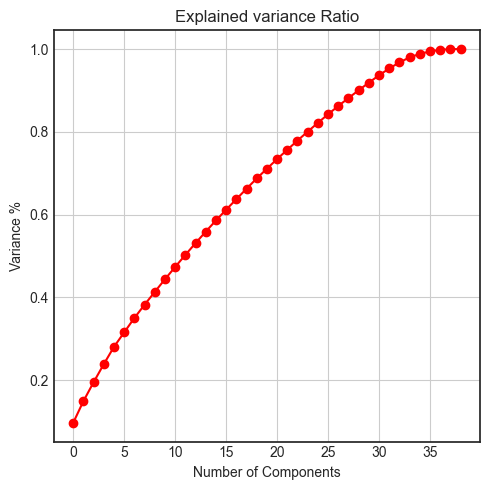

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X)
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

##### Observation :
As per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.

In [60]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X)

In [61]:
X = pd.DataFrame(x_new,columns=np.arange(28))

### Model Building

In [65]:
## Importing Neccessary Libraries for classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

## Importing Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Finding the Best Random State

In [66]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_score = (accuracy_score(y_test, y_pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"for Random State", maxRS)

Best accuracy score is 82.43243243243244 for Random State 954


- Our best Random State is 954

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=954)

In [69]:
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (1110, 28)
Training target vector size: (1110,)
Test feature matrix size: (370, 28)
Test target vector size: (370,)


- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'fraud_report'
- The function will Calculate accuracy score, generating the classification report, the Cross-Validation score and in the end it will Calculate the Difference between the accuracy score and cross validation score.

In [70]:
def Fraud(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 954)    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", accuracy)
    
    # Classification Report
    Report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", Report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Logistic Regression

In [71]:
model = LogisticRegression()
Fraud(model, X, y)

Accuracy Score: 82.43243243243244

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       177
           1       0.85      0.81      0.83       193

    accuracy                           0.82       370
   macro avg       0.82      0.83      0.82       370
weighted avg       0.83      0.82      0.82       370

Cross Validation Score: 75.67567567567568

Accuracy Score - Cross Validation Score is 4.5945945945945965


#### Support Vector Classifier

In [72]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=129)
Fraud(model, X, y)

Accuracy Score: 85.4054054054054

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       177
           1       0.91      0.80      0.85       193

    accuracy                           0.85       370
   macro avg       0.86      0.86      0.85       370
weighted avg       0.86      0.85      0.85       370

Cross Validation Score: 81.21621621621621

Accuracy Score - Cross Validation Score is -0.9459459459459367


#### Decision Tree Classifier 

In [73]:
model = DecisionTreeClassifier()
Fraud(model, X, y)

Accuracy Score: 71.08108108108108

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       177
           1       0.74      0.68      0.71       193

    accuracy                           0.71       370
   macro avg       0.71      0.71      0.71       370
weighted avg       0.71      0.71      0.71       370

Cross Validation Score: 67.36486486486487

Accuracy Score - Cross Validation Score is 12.905405405405403


#### Random Forest Classifier 

In [74]:
model = RandomForestClassifier(random_state=129)
Fraud(model, X, y)

Accuracy Score: 80.54054054054053

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       177
           1       0.85      0.76      0.80       193

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370

Cross Validation Score: 79.5945945945946

Accuracy Score - Cross Validation Score is 0.6756756756756772


#### K Neigbours Classifiers

In [75]:
model=KNeighborsClassifier(n_neighbors=15)
Fraud(model, X, y)

Accuracy Score: 69.45945945945947

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.44      0.58       177
           1       0.64      0.93      0.76       193

    accuracy                           0.69       370
   macro avg       0.75      0.68      0.67       370
weighted avg       0.74      0.69      0.67       370

Cross Validation Score: 67.43243243243244

Accuracy Score - Cross Validation Score is 12.837837837837839


#### Extra Tree Classifier

In [76]:
model=ExtraTreesClassifier()
Fraud(model, X, y)

Accuracy Score: 84.32432432432432

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       177
           1       0.88      0.81      0.84       193

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.85      0.84      0.84       370

Cross Validation Score: 81.6891891891892

Accuracy Score - Cross Validation Score is -1.4189189189189193


#### XBBoost Classifier

In [77]:
model=xgb.XGBClassifier(verbosity=0)
Fraud(model, X, y)

Accuracy Score: 84.86486486486487

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       177
           1       0.87      0.83      0.85       193

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

Cross Validation Score: 77.83783783783784

Accuracy Score - Cross Validation Score is 2.432432432432435


- Based on the accuracy score and cross-validation score, the best model among the given classifiers is the Support Vector Classifier (SVC) with an accuracy score of 85.41% and a cross-validation score of 81.22%. SVC outperformed the Logistic Regression, Decision Tree Classifier, K Neighbours classifier, Extra Tree Classifier, and XGBoost Classifier in terms of accuracy and cross-validation score. However, it is important to note that the performance of a model can be influenced by various factors such as the quality of data, feature engineering, hyperparameter tuning, and more. Hence, it is always advisable to try out different models and techniques to find the one that works best for a specific problem.

### Hyperparameter tuning 

##### Support Vector Classifier

In [84]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

SyntaxError: invalid syntax (207474006.py, line 1)

In [85]:
grid_search = GridSearchCV(SVC(random_state=129), param_grid, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=129),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [86]:
grid_search.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [87]:
grid_search.best_score_

0.8405405405405405

In [94]:
from sklearn import svm
Final_Model = svm.SVC(kernel='rbf', C=10, gamma='auto', probability=True)
Classifier = Final_Model.fit(X_train, y_train)
Final_pred = Final_Model.predict(X_test)
accuracy = (accuracy_score(y_test, Final_pred))*100
print("Accuracy score for the Best Model is:", accuracy)

Accuracy score for the Best Model is: 84.5945945945946


### AUC ROC score

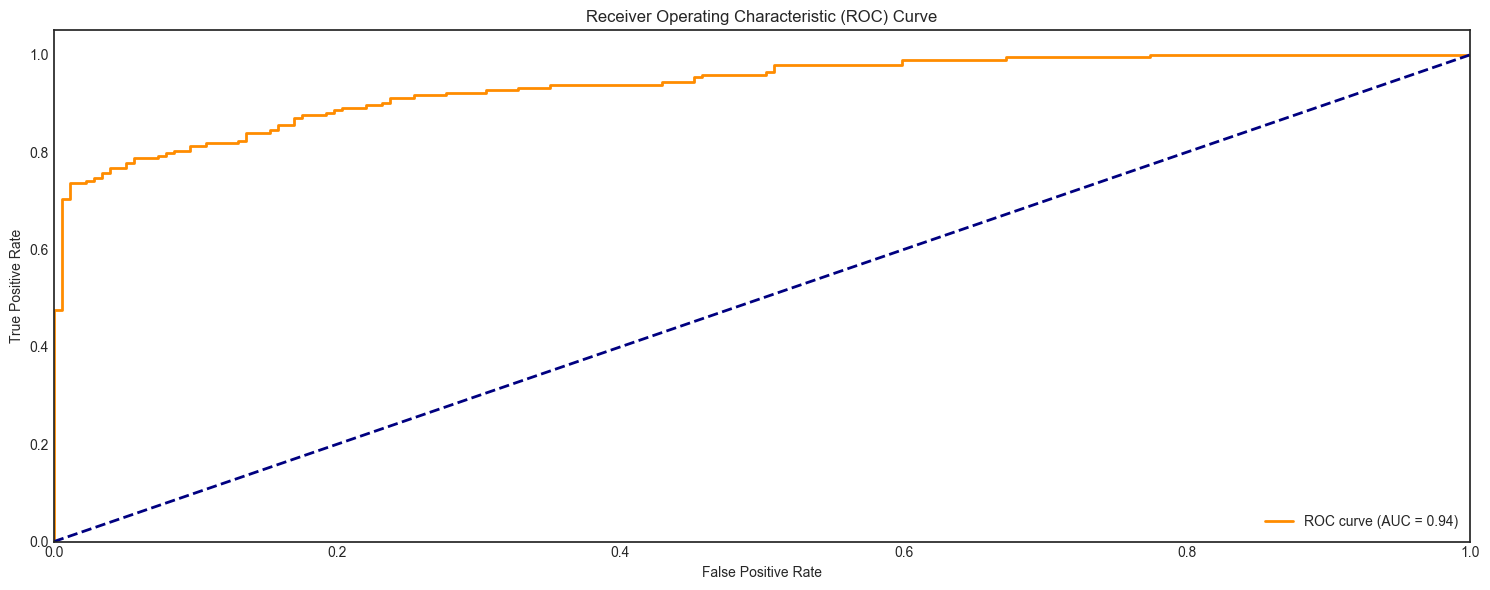

In [95]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_score = Final_Model.predict_proba(X_test)[:, 1]

# calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- AUC score = 0.94

### Confusion Matrix

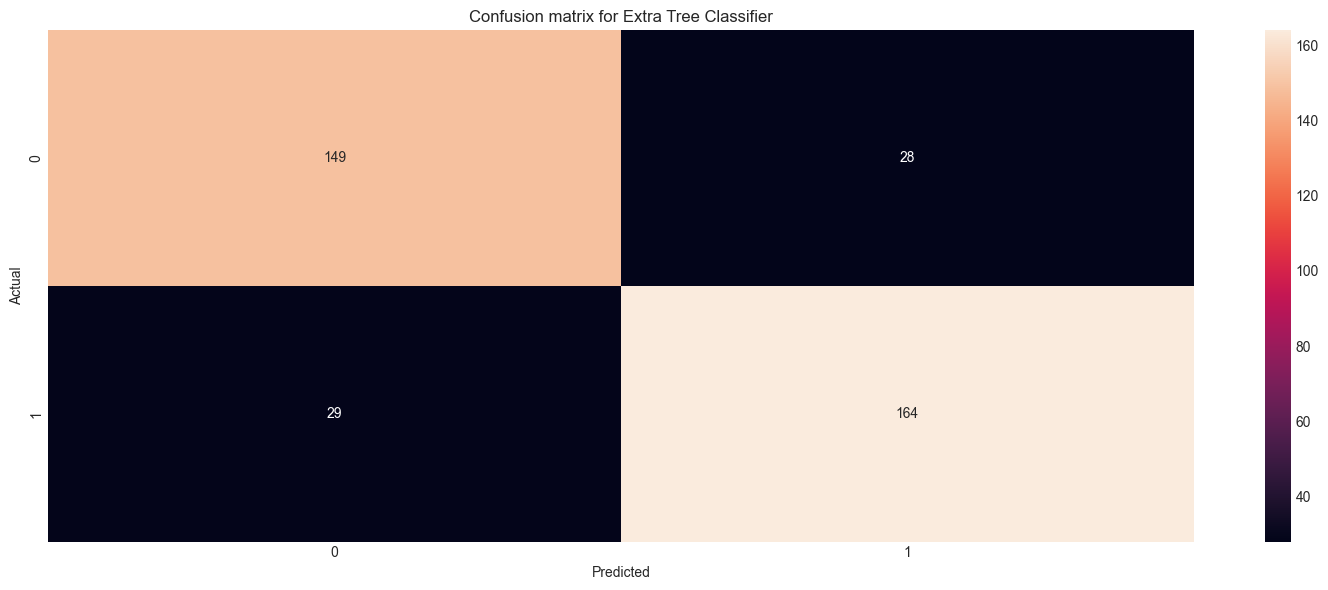

In [96]:
from sklearn.metrics import confusion_matrix

y_pred = Final_Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Extra Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Saving the model

In [97]:
import joblib
filename = "Fraud_Detection.pkl"
joblib.dump(Final_Model, filename)

['Fraud_Detection.pkl']

### Predicting the Final Model

In [100]:
prediction = Final_Model.predict(X_test)

In [102]:
# Prediction
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,1,1
2,0,0
3,0,0
4,0,1
